# MODULE 1 — Topological Characterization & Global Consensus IIT
- **Topological Profiling**: Multi-scale descriptor extraction and morphological visualization for Social, Molecular, Protein, and Linguistic networks.
- **Consensus Benchmarking**: Aggregated feature importance analysis across Gradient Boosting, Random Forest, and Logistic Regression to mitigate model-specific bias.
- **IIT Logic & Anchor Selection**: Identification of the universal structural backbone via the Global Consensus $IIT_{score, G}$ (averaged across all 12 directed domain pairs).
- **Data Integrity**: Automated NaN imputation and Z-score standardization to ensure numerical stability during cross-disciplinary knowledge propagation.

✅ Kernel uses the correct virtual environment: ml-env
🖥️ Using GPU: NVIDIA A100-PCIE-40GB
📊 Memory: 17777 MB free / 40326 MB total

📥 Pre-calculating graph pools for 10-seed efficiency...

🚀 Starting benchmarking over 10 seeds...
🌱 [SEED 1] Processing 1/10...
📸 Figure saved: social_example.png / .tiff / .pdf


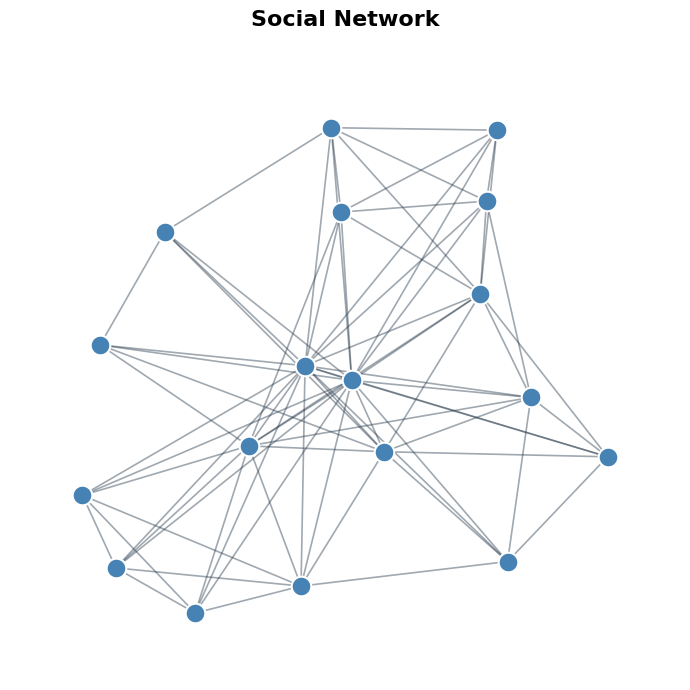

📸 Figure saved: molecular_example.png / .tiff / .pdf


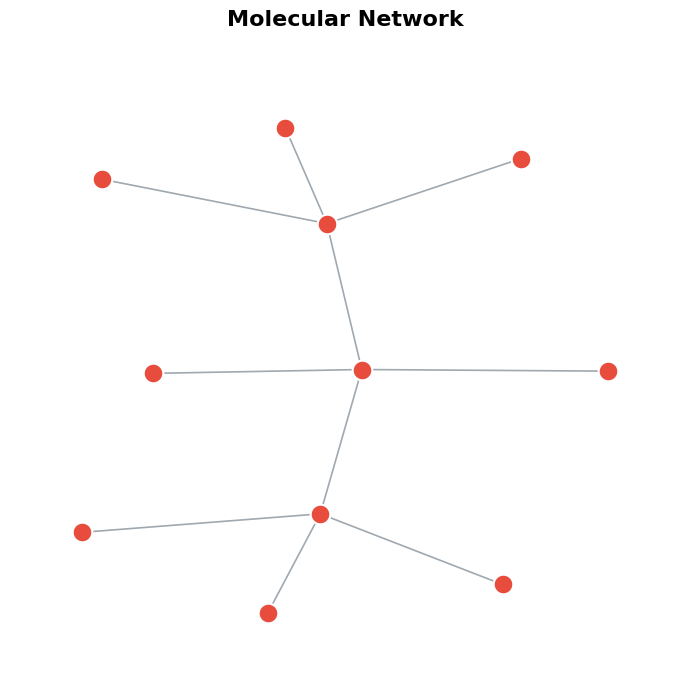

📸 Figure saved: protein_example.png / .tiff / .pdf


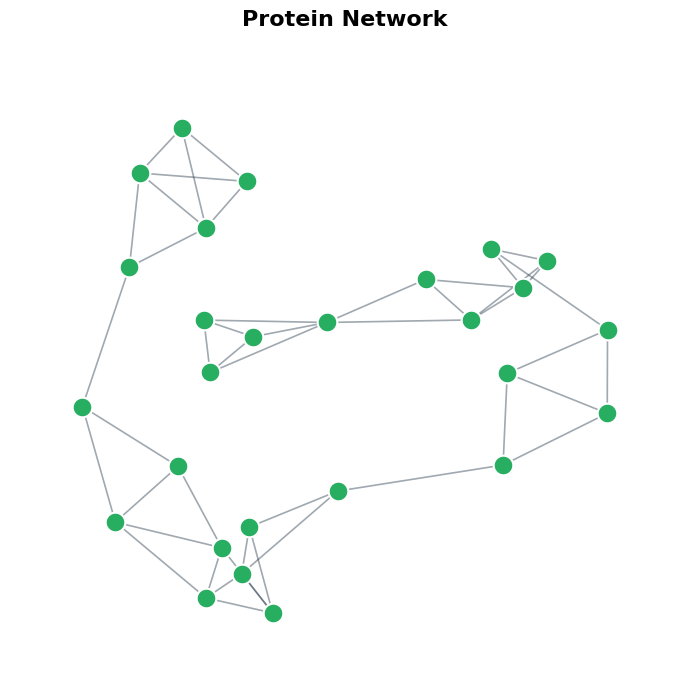

📸 Figure saved: linguistic_example.png / .tiff / .pdf


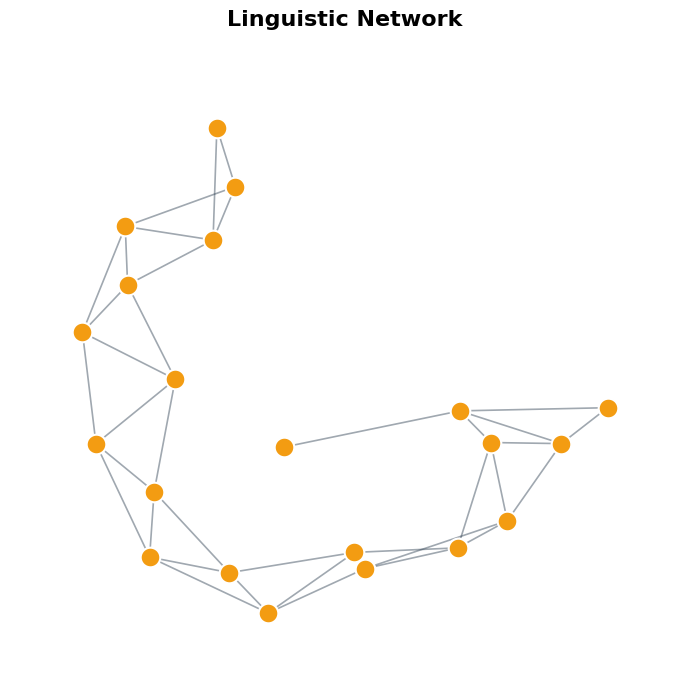

🌱 [SEED 24] Processing 2/10...
🌱 [SEED 42] Processing 3/10...
🌱 [SEED 50] Processing 4/10...
🌱 [SEED 123] Processing 5/10...
🌱 [SEED 501] Processing 6/10...
🌱 [SEED 700] Processing 7/10...
🌱 [SEED 800] Processing 8/10...
🌱 [SEED 920] Processing 9/10...
🌱 [SEED 999] Processing 10/10...

📊 Aggregating results and generating figures...

=== Cross-Validated Performance Comparison (10-Seed Mean) ===


Accuracy  F1_macro   ROC_AUC
Model                                           
GradientBoosting      0.9681  0.968013  0.997236
LogisticRegression    0.9637  0.963544  0.996084
RandomForest          0.9641  0.963908  0.996898

📸 Figure saved: confusion_matrix_avg.png / .tiff / .pdf


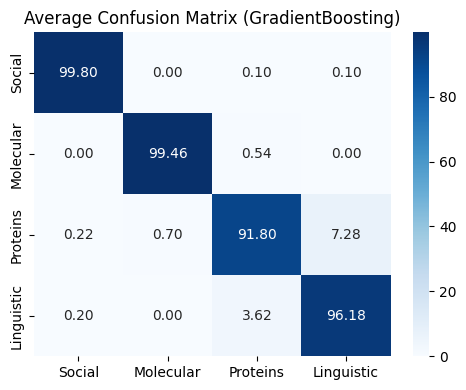

📸 Figure saved: borda_importance.png / .tiff / .pdf


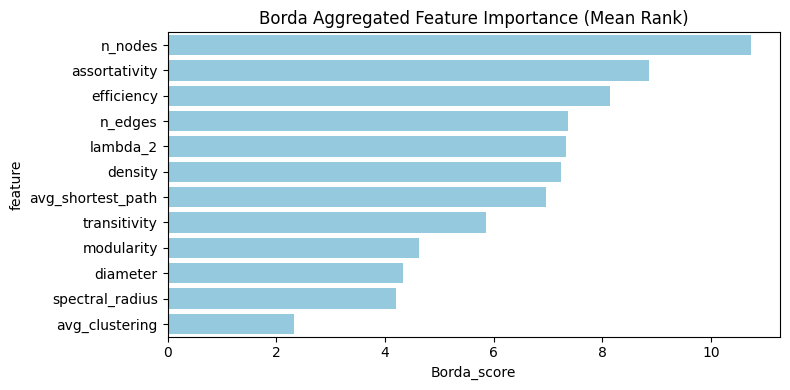


📊 Table Consensus Feature Importance Ranking (Borda Count)



🧠 Structural Similarity Matrix (Averaged):


Social  Molecular  Proteins  Linguistic
Social       1.000      0.797     0.930       0.965
Molecular    0.797      1.000     0.804       0.839
Proteins     0.930      0.804     1.000       0.979
Linguistic   0.965      0.839     0.979       1.000

📸 Figure saved: structural_similarity_matrix.png / .tiff / .pdf


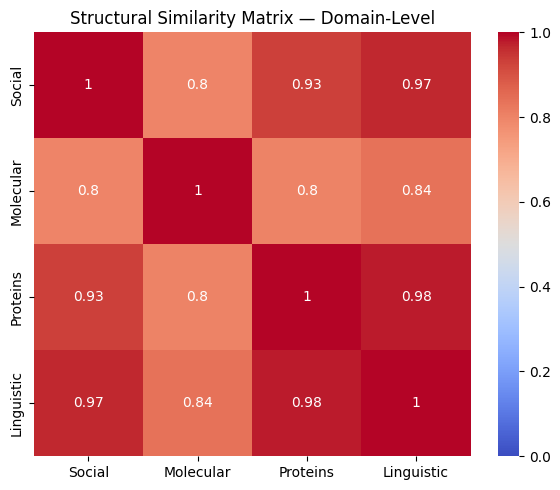


📊 Pairwise structural bridge strength (IIT scores):


DomainPair  IIT_score_pair  \
0       Social → Molecular          0.2144   
1        Social → Proteins          0.1555   
2      Social → Linguistic          0.1408   
3       Molecular → Social          0.2144   
4     Molecular → Proteins          0.1627   
5   Molecular → Linguistic          0.1800   
6        Proteins → Social          0.1555   
7     Proteins → Molecular          0.1627   
8    Proteins → Linguistic          0.2464   
9      Linguistic → Social          0.1408   
10  Linguistic → Molecular          0.1800   
11   Linguistic → Proteins          0.2464   

                               top_transferable_feats  
0   [transitivity, lambda_2, efficiency, avg_short...  
1   [efficiency, density, transitivity, lambda_2, ...  
2   [n_nodes, efficiency, lambda_2, transitivity, ...  
3   [transitivity, lambda_2, efficiency, avg_short...  
4   [efficiency, density, lambda_2, modularity, tr...  
5   [lambda_2, efficiency, density, modularity, av...  
6   [efficiency, density, transitivity, lambda_2, ...  
7   [efficiency, density, lambda_2, modularity, tr...  
8   [density, efficiency, n_nodes, lambda_2, trans...  
9   [n_nodes, efficiency, lambda_2, transitivity, ...  
10  [lambda_2, efficiency, density, modularity, av...  
11  [density, efficiency, n_nodes, lambda_2, trans...

📸 Figure saved: fig2_global_ranked_anchors.png / .tiff / .pdf


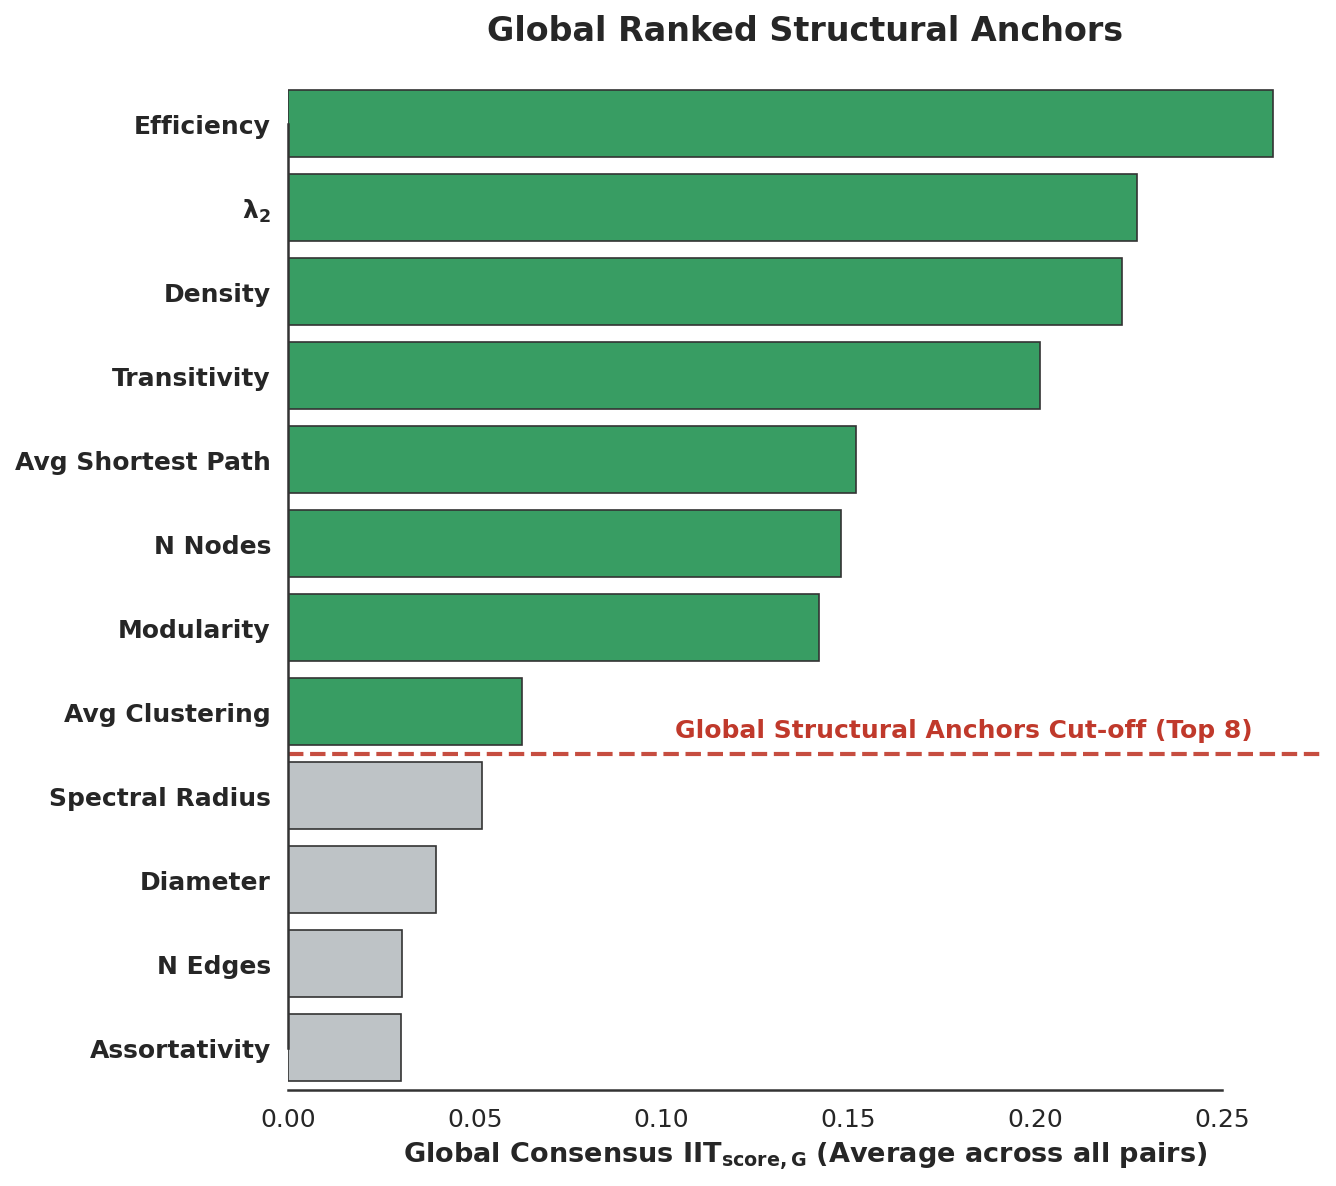


✅ MODULE 1 Completed.
📌 Global Structural Anchors identified: ['efficiency', 'lambda_2', 'density', 'transitivity', 'avg_shortest_path', 'n_nodes', 'modularity', 'avg_clustering']
📌 Analysis averaged over 10 independent seeds.


In [1]:
# ==============================================================================
# === X-CDTL Framework | Module 1: Topological Characterization & IIT Logic ===
# ==============================================================================
# Researcher: Daniele Caligiore
# Affiliation: CNR - Italian National Research Council (ISTC)
# Version: 3.0 (Feb 2026)
# ------------------------------------------------------------------------------
# DESCRIPTION:
# This module performs multi-domain characterization of graph ensembles across 
# disparate scientific fields (Social, Molecular, Protein, Linguistic). 
# It implements the Importance Inversion Transfer (IIT) strategy to identify 
# universal structural anchors by formalizing the transition from domain-specific 
# discriminative utility to global transferability potential.
#
# CORE PIPELINE:
# 1. Multi-scale topological feature extraction (GPU-accelerated).
# 2. Benchmarking across Gradient Boosting, Random Forest, and Logistic Regression.
# 3. Calculation of directed Pairwise IIT scores (integrating Borda importance, 
#    rank-order consistency, and metric compatibility).
# 4. Identification of universal Structural Anchors via the Global Consensus 
#    IIT score (G), derived from averaging all cross-domain transitions.
# 5. High-resolution morphological visualization of the universal structural backbone.
# ------------------------------------------------------------------------------

import sys, os, subprocess, torch

# ------------------------------------------------------------
# === ENVIRONMENT CHECK ===
# ------------------------------------------------------------
expected_venv = "ml-env"
if expected_venv in sys.prefix:
    print(f"✅ Kernel uses the correct virtual environment: {expected_venv}")
else:
    print(f"⚠️ Warning: current kernel not in {expected_venv} → please select ml-env/bin/python")

# ------------------------------------------------------------
# === GPU DETECTION & ASSIGNMENT ===
# ------------------------------------------------------------
def find_free_gpu():
    """Return index of GPU with most free memory."""
    try:
        smi_output = subprocess.check_output(
            "nvidia-smi --query-gpu=index,memory.free --format=csv,noheader,nounits",
            shell=True
        ).decode("utf-8").strip().split("\n")
        gpus = [(int(line.split(",")[0]), int(line.split(",")[1])) for line in smi_output]
        gpus.sort(key=lambda x: x[1], reverse=True)
        return str(gpus[0][0])
    except Exception as e:
        print("⚠️ Unable to detect free GPU:", e)
        return "0"

free_gpu = find_free_gpu()
os.environ["CUDA_VISIBLE_DEVICES"] = free_gpu

if torch.cuda.is_available():
    current_device = torch.cuda.current_device()
    gpu_name = torch.cuda.get_device_name(current_device)
    free_mem, total_mem = torch.cuda.mem_get_info()
    
    print(f"🖥️ Using GPU: {gpu_name}")
    print(f"📊 Memory: {free_mem//1024**2} MB free / {total_mem//1024**2} MB total")
    device = torch.device("cuda")
else:
    print("⚠️ GPU not available, using CPU")
    device = torch.device("cpu")

# ------------------------------------------------------------
# === IMPORTS ===
# ------------------------------------------------------------
import random, warnings
warnings.filterwarnings("ignore")

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from scipy.stats import spearmanr
from torch_geometric.datasets import QM9, TUDataset
import networkx as nx, pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix
from community import community_louvain
import nltk
nltk.download('brown', quiet=True)
from nltk.corpus import brown

# ------------------------------------------------------------
# === GLOBAL SEED CONTROL ===
# ------------------------------------------------------------
target_seeds = [1, 24, 42, 50, 123, 501, 700, 800, 920, 999]

def set_global_seed(seed=42):
    """Ensure full reproducibility across NumPy, Torch, and Python RNGs."""
    np.random.seed(seed); random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available(): torch.cuda.manual_seed_all(seed) 
    torch.backends.cudnn.deterministic = True; torch.backends.cudnn.benchmark = False

# ------------------------------------------------------------
# === GRAPH METRIC COMPUTATION ===
# ------------------------------------------------------------
def largest_component(g):
    """Return the largest connected component of a graph."""
    return g if nx.is_connected(g) else g.subgraph(max(nx.connected_components(g), key=len)).copy()

def compute_metrics(g):
    """Compute multi-scale structural metrics of a graph."""
    gc = largest_component(g)
    A = nx.to_numpy_array(gc)
    n = gc.number_of_nodes()
    if n < 2:
        return {m: np.nan for m in [
            "n_nodes","n_edges","density","avg_clustering","transitivity",
            "assortativity","efficiency","avg_shortest_path","diameter",
            "spectral_radius","lambda_2","modularity"
        ]}
    eig_A = np.linalg.eigvals(A)
    spectral_radius = float(np.max(np.abs(np.real(eig_A))))
    L = nx.normalized_laplacian_matrix(gc).toarray()
    eig_L = np.real(np.linalg.eigvals(L))
    lambda_2 = sorted(eig_L)[1] if len(eig_L) > 1 else 0
    try:
        asp = nx.average_shortest_path_length(gc)
        diam = nx.diameter(gc)
    except Exception:
        asp, diam = np.nan, np.nan
    partition = community_louvain.best_partition(gc)
    modularity = community_louvain.modularity(partition, gc)
    return dict(
        n_nodes=n, n_edges=gc.number_of_edges(), density=nx.density(gc),
        avg_clustering=nx.average_clustering(gc), transitivity=nx.transitivity(gc),
        assortativity=nx.degree_assortativity_coefficient(gc),
        efficiency=nx.global_efficiency(gc), avg_shortest_path=asp, diameter=diam,
        spectral_radius=spectral_radius, lambda_2=lambda_2, modularity=modularity
    )

# ------------------------------------------------------------
# === FIGURE EXPORT UTILITY (Nature-quality) ===
# ------------------------------------------------------------
output_dir = "figures_nature"
os.makedirs(output_dir, exist_ok=True)

def save_highres(filename_base):
    """Save figure in PNG (600 DPI) plus TIFF and PDF for high-quality publication."""
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f"{filename_base}.png"), dpi=600, bbox_inches="tight")
    plt.savefig(os.path.join(output_dir, f"{filename_base}.tiff"), dpi=600, bbox_inches="tight", transparent=True)
    plt.savefig(os.path.join(output_dir, f"{filename_base}.pdf"), bbox_inches="tight", transparent=True)
    print(f"📸 Figure saved: {filename_base}.png / .tiff / .pdf")

def plot_example_graph(graph, title, node_color, filename=None):
    """Plots a high-quality example graph with uniform node size and darker connections."""
    plt.figure(figsize=(7, 7))
    
    pos = nx.spring_layout(graph, k=0.6, seed=42)
    
    nx.draw_networkx_edges(
        graph, 
        pos, 
        alpha=0.45, 
        width=1.2, 
        edge_color='#2c3e50'
    )
    
    nx.draw_networkx_nodes(
        graph, 
        pos, 
        node_size=200, 
        node_color=node_color, 
        edgecolors='white',    
        linewidths=1.5,
        alpha=1.0
    )
    
    plt.title(title, fontsize=16, fontweight="bold", pad=25)
    plt.axis("off")
    
    plt.margins(0.08) 
    
    if filename:
        save_highres(filename)
    plt.show()

# ------------------------------------------------------------
# === LOAD FOUR GRAPH DOMAINS (POOLING FOR EFFICIENCY) ===
# ------------------------------------------------------------
print("\n📥 Pre-calculating graph pools for 10-seed efficiency...")

# --- Social Domain ---
url = "https://snap.stanford.edu/data/facebook_combined.txt.gz"
if not os.path.exists("facebook_combined.txt"):
    !wget -q -O facebook_combined.txt.gz {url} && gunzip -f facebook_combined.txt.gz
G_fb_full = nx.read_edgelist("facebook_combined.txt", nodetype=int)
eligible_nodes = [n for n in G_fb_full.nodes() if 10 <= nx.ego_graph(G_fb_full, n).number_of_nodes() <= 30]
pool_ego_graphs = [nx.ego_graph(G_fb_full, n) for n in eligible_nodes[:1000]]
pool_ego_metrics = pd.DataFrame([compute_metrics(g) for g in pool_ego_graphs])

# --- Molecular Domain ---
dataset_qm9 = QM9(root="qm9_data")
def pyg_to_nx(data):
    G = nx.Graph(); G.add_nodes_from(range(data.num_nodes))
    G.add_edges_from(data.edge_index.t().tolist()); return G
pool_mol_graphs = [pyg_to_nx(dataset_qm9[i]) for i in range(1500) if 10 <= dataset_qm9[i].num_nodes <= 30][:1000]
pool_mol_metrics = pd.DataFrame([compute_metrics(g) for g in pool_mol_graphs])

# --- Protein Domain ---
dataset_prot = TUDataset(root="data_prot", name="PROTEINS")
pool_prot_graphs = []
for data in dataset_prot:
    G_p = nx.Graph(); G_p.add_edges_from(data.edge_index.numpy().T)
    if 10 <= G_p.number_of_nodes() <= 30: pool_prot_graphs.append(G_p)
    if len(pool_prot_graphs) == 1000: break
pool_prot_metrics = pd.DataFrame([compute_metrics(g) for g in pool_prot_graphs])

# --- Linguistic Domain ---
pool_lang_graphs = []; WINDOW = 2; brown_sents = list(brown.sents())
for sent in brown_sents:
    words = [w.lower() for w in sent if w.isalpha()]
    if len(words) < 10: continue
    G_l = nx.Graph()
    for i in range(len(words) - WINDOW):
        for j in range(1, WINDOW + 1): G_l.add_edge(words[i], words[i+j])
    if 10 <= G_l.number_of_nodes() <= 30: pool_lang_graphs.append(G_l)
    if len(pool_lang_graphs) == 1000: break
pool_lang_metrics = pd.DataFrame([compute_metrics(g) for g in pool_lang_graphs])

# ------------------------------------------------------------
# === DATA COLLECTION CONTAINERS ===
# ------------------------------------------------------------
rf_ranks_accum = []
gb_ranks_accum = []
lr_ranks_accum = []

all_run_results = []
all_run_cms = []
all_run_importance = []
all_run_similarity = []
pairwise_accumulator = {} 
metrics = ["n_nodes","n_edges","density","avg_clustering","transitivity",
           "assortativity","efficiency","avg_shortest_path","diameter",
           "spectral_radius","lambda_2","modularity"]

# ------------------------------------------------------------
# === MAIN MULTI-SEED LOOP ===
# ------------------------------------------------------------
print(f"\n🚀 Starting benchmarking over {len(target_seeds)} seeds...")

for run_idx, s in enumerate(target_seeds):
    print(f"🌱 [SEED {s}] Processing {run_idx+1}/{len(target_seeds)}...")
    set_global_seed(s)

    # Pool sampling
    df_ego = pool_ego_metrics.sample(500, random_state=s).copy(); df_ego["label"] = 0
    df_qm9 = pool_mol_metrics.sample(500, random_state=s).copy(); df_qm9["label"] = 1
    df_prot = pool_prot_metrics.sample(500, random_state=s).copy(); df_prot["label"] = 2
    df_lang = pool_lang_metrics.sample(500, random_state=s).copy(); df_lang["label"] = 3

    # Plot examples (first seed)
    if run_idx == 0:
        # Social: Steel Blue
        plot_example_graph(pool_ego_graphs[0], "Social Network", '#4682B4', "social_example")
        # Molecular: Alizarin/Coral
        plot_example_graph(pool_mol_graphs[0], "Molecular Network", '#E74C3C', "molecular_example")
        # Protein: Emerald Green
        plot_example_graph(pool_prot_graphs[0], "Protein Network", '#27AE60', "protein_example")
        # Linguistic: Goldenrod
        plot_example_graph(pool_lang_graphs[0], "Linguistic Network", '#F39C12', "linguistic_example")

    df_all = pd.concat([df_ego, df_qm9, df_prot, df_lang], ignore_index=True)
    
    imputer = SimpleImputer(strategy="median")
    scaler = StandardScaler()
    
    X = df_all[metrics] # Keep raw data for splitting
    y = df_all["label"]

    # Multi-model Baseline
    models = {
        "RandomForest": RandomForestClassifier(n_estimators=300, max_depth=8, random_state=s),
        "GradientBoosting": GradientBoostingClassifier(random_state=s),
        "LogisticRegression": LogisticRegression(max_iter=1000, multi_class="multinomial", random_state=s)
    }
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=s)
    
    for name, model in models.items():
        accs, f1s, aucs = [], [], []
        cms_model = np.zeros((4,4))
        
        for tr, te in cv.split(X, y):
            # --- PREVENT DATA LEAKAGE ---
            # 1. Split raw data first
            X_train_fold, X_test_fold = X.iloc[tr], X.iloc[te]
            y_train_fold, y_test_fold = y.iloc[tr], y.iloc[te]

            # 2. Fit imputer and scaler ONLY on training fold
            imputer_fold = SimpleImputer(strategy="median").fit(X_train_fold)
            X_train_imputed = imputer_fold.transform(X_train_fold)
            
            scaler_fold = StandardScaler().fit(X_train_imputed)
            
            # 3. Transform both folds using training statistics
            X_train_final = scaler_fold.transform(X_train_imputed)
            X_test_final = scaler_fold.transform(imputer_fold.transform(X_test_fold))

            # 4. Train model on processed training fold
            model.fit(X_train_final, y_train_fold)
            
            # 5. Predict and evaluate on processed test fold
            y_pred = model.predict(X_test_final)
            y_proba = model.predict_proba(X_test_final)
            
            accs.append(accuracy_score(y_test_fold, y_pred))
            f1s.append(f1_score(y_test_fold, y_pred, average="macro"))
            aucs.append(roc_auc_score(pd.get_dummies(y_test_fold), y_proba, multi_class="ovr"))
            
            if name == "GradientBoosting": 
                cms_model += confusion_matrix(y_test_fold, y_pred, labels=[0,1,2,3])
        all_run_results.append({"Model": name, "Accuracy": np.mean(accs), "F1_macro": np.mean(f1s), "ROC_AUC": np.mean(aucs)})
        if name == "GradientBoosting": all_run_cms.append(cms_model / 5)

    # Feature Importance (Borda)
    feature_ranks_seed = pd.DataFrame() 
    
    X_global_imputed = SimpleImputer(strategy="median").fit_transform(X)
    X_global_scaled = StandardScaler().fit_transform(X_global_imputed)

    for name, model in models.items():
        model.fit(X_global_scaled, y) 
        fi = model.feature_importances_ if hasattr(model, "feature_importances_") else np.abs(model.coef_).mean(axis=0)
        feature_ranks_seed[name] = pd.Series(fi, index=metrics)
    
    seed_ranks = feature_ranks_seed.rank(ascending=False)
    
    rf_ranks_accum.append(seed_ranks["RandomForest"])
    gb_ranks_accum.append(seed_ranks["GradientBoosting"])
    lr_ranks_accum.append(seed_ranks["LogisticRegression"])
    
    all_run_importance.append(seed_ranks.mean(axis=1))

    # Structural Similarity (Global)
    domains_dict = {"Social": df_ego, "Molecular": df_qm9, "Proteins": df_prot, "Linguistic": df_lang}
    all_run_similarity.append(pd.DataFrame({d: domains_dict[d][metrics].mean() for d in domains_dict}).corr(method="spearman"))

    # Pairwise Transfer Analysis
    from itertools import permutations
    for (src_n, src_df), (tgt_n, tgt_df) in permutations(domains_dict.items(), 2):
        pair_key = f"{src_n} → {tgt_n}"
        if pair_key not in pairwise_accumulator: pairwise_accumulator[pair_key] = {"corrs": [], "diffs": []}
        corrs = [abs(spearmanr(src_df[m], tgt_df[m])[0]) if not np.isnan(spearmanr(src_df[m], tgt_df[m])[0]) else 0 for m in metrics]
        diffs = [abs(src_df[m].mean() - tgt_df[m].mean()) for m in metrics]
        pairwise_accumulator[pair_key]["corrs"].append(corrs)
        pairwise_accumulator[pair_key]["diffs"].append(diffs)

# ------------------------------------------------------------
# === FINAL AGGREGATION & RESULTS ===
# ------------------------------------------------------------
print("\n📊 Aggregating results and generating figures...")

# 1. Performance Comparison
df_perf = pd.DataFrame(all_run_results).groupby("Model").mean()
print("\n=== Cross-Validated Performance Comparison (10-Seed Mean) ===")
display(df_perf)

# 2. Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(np.mean(all_run_cms, axis=0), annot=True, cmap="Blues", fmt=".2f",
            xticklabels=["Social", "Molecular", "Proteins", "Linguistic"],
            yticklabels=["Social", "Molecular", "Proteins", "Linguistic"])
plt.title("Average Confusion Matrix (GradientBoosting)")
save_highres("confusion_matrix_avg")
plt.show()

# 3. Borda Feature Importance
avg_borda = pd.concat(all_run_importance, axis=1).mean(axis=1).sort_values()
df_importance = avg_borda.reset_index().rename(columns={"index": "feature", 0: "Borda_score"}).sort_values("Borda_score", ascending=False)
plt.figure(figsize=(8,4)); sns.barplot(data=df_importance, x="Borda_score", y="feature", color="skyblue")
plt.title("Borda Aggregated Feature Importance (Mean Rank)"); save_highres("borda_importance"); plt.show()

# ------------------------------------------------------------
# === TABLE CONSENSUS FEATURE IMPORTANCE (BORDA COUNT) ===
# ------------------------------------------------------------
print("\n📊 Table Consensus Feature Importance Ranking (Borda Count)")

df_table_4 = pd.DataFrame({
    "Feature": metrics,
    "RF Rank": pd.concat(rf_ranks_accum, axis=1).mean(axis=1).values,
    "GB Rank": pd.concat(gb_ranks_accum, axis=1).mean(axis=1).values,
    "LR Rank": pd.concat(lr_ranks_accum, axis=1).mean(axis=1).values
})

df_table_4["Borda Score"] = df_table_4[["RF Rank", "GB Rank", "LR Rank"]].mean(axis=1)
df_table_4 = df_table_4.sort_values("Borda Score").reset_index(drop=True)
display(df_table_4.style.format({"RF Rank": "{:.1f}", "GB Rank": "{:.1f}", "LR Rank": "{:.1f}", "Borda Score": "{:.3f}"}))
df_table_4.to_csv(os.path.join(output_dir, "table_4_consensus_ranking.csv"), index=False)

# 4. Structural Similarity Matrix
domain_order = ["Social", "Molecular", "Proteins", "Linguistic"]
avg_sim = pd.concat(all_run_similarity).groupby(level=0).mean()
avg_sim = avg_sim.reindex(index=domain_order, columns=domain_order)
print("\n🧠 Structural Similarity Matrix (Averaged):")
display(avg_sim.round(3))
plt.figure(figsize=(6,5)); sns.heatmap(avg_sim, annot=True, cmap="coolwarm", vmin=0, vmax=1)
plt.title("Structural Similarity Matrix — Domain-Level"); save_highres("structural_similarity_matrix"); plt.show()

# ------------------------------------------------------------------------------
# === PAIRWISE ANALYSIS & GLOBAL CONSENSUS IIT_score (G) CALCULATION ===
# ------------------------------------------------------------------------------
final_pairwise = []
all_iit_vectors = [] 

# Aligned Borda reference
df_importance = pd.concat(all_run_importance, axis=1).mean(axis=1).reset_index()
df_importance.columns = ["feature", "Borda_score"]
df_importance = df_importance.set_index("feature").reindex(metrics).reset_index()

for p_key, data in pairwise_accumulator.items():
    mean_corrs = np.mean(data["corrs"], axis=0)
    mean_diffs = np.mean(data["diffs"], axis=0)
    
    # Directed IIT score calculation (Main Metric)
    iit_vector_pairwise = df_importance["Borda_score"].values * (mean_corrs / (1 + mean_diffs))
    all_iit_vectors.append(iit_vector_pairwise)
    
    df_tmp = pd.DataFrame({"feature": metrics, "score": iit_vector_pairwise})
    top_8_pair = df_tmp.sort_values("score", ascending=False).head(8)
    
    final_pairwise.append({
        "DomainPair": p_key, 
        "IIT_score_pair": round(top_8_pair["score"].mean(), 4), # Bridges strength
        "top_transferable_feats": top_8_pair["feature"].tolist()
    })

# We average the behavior of each feature across all possible domain leaps
df_importance["IIT_score_G"] = np.mean(all_iit_vectors, axis=0)

# Selection of the 8 universal Structural Anchors (Top Feats)
transferable_features = df_importance.sort_values("IIT_score_G", ascending=False).head(8)["feature"].tolist()

# Update global variables for Module 3 & 4
df_pw = pd.DataFrame(final_pairwise)
globals()["df_pairwise_transfer"] = df_pw
globals()["transferable_features"] = transferable_features

print("\n📊 Pairwise structural bridge strength (IIT scores):")
display(df_pw) 


# ------------------------------------------------------------------------------
# === VISUALIZATION: FIGURE 2 (Global Ranked Structural Anchors) ===
# ------------------------------------------------------------------------------
sns.set_theme(style="white", context="paper") 
plt.rcParams.update({
    "font.family": "sans-serif", "axes.edgecolor": "#333333",
    "axes.linewidth": 1.2, "axes.labelweight": "bold", "figure.dpi": 150
})

df_ranked = df_importance.sort_values("IIT_score_G", ascending=False).reset_index(drop=True)

plt.figure(figsize=(9, 8))
ax = plt.gca()

# Visual Parsimony: Green for anchors, Gray for non-anchors
colors_bar = ['#27AE60' if i < 8 else '#BDC3C7' for i in range(len(df_ranked))]

sns.barplot(x="IIT_score_G", y="feature", data=df_ranked, palette=colors_bar, edgecolor='#333333', linewidth=0.8)

# Format Y-labels with Bold math for Lambda 2
clean_labels = []
for n in df_ranked['feature']:
    is_anchor = n in transferable_features
    if n == 'lambda_2':
        clean_labels.append(r'$\mathbf{\lambda_2}$' if is_anchor else r'$\lambda_2$')
    else:
        clean_labels.append(n.replace('_',' ').title())
ax.set_yticklabels(clean_labels, fontsize=12, fontweight='bold')
from matplotlib.ticker import FormatStrFormatter
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f')) 
ax.tick_params(axis='x', labelsize=12)   

# Cut-off line for scientific justification of the 8-anchor set
ax.axhline(y=7.5, color='#C0392B', linestyle='--', linewidth=2, alpha=0.9)
ax.text(df_ranked['IIT_score_G'].max() * 0.98, 7.3, "Global Structural Anchors Cut-off (Top 8)", 
         color='#C0392B', fontweight='bold', fontsize=12, ha='right')

plt.title("Global Ranked Structural Anchors", fontsize=16, fontweight='bold', pad=20)
plt.xlabel(r"Global Consensus $\mathbf{IIT}_{\mathbf{score, G}}$ (Average across all pairs)", fontsize=13, fontweight='bold')
plt.ylabel("")

sns.despine(trim=True)
plt.tight_layout()

save_highres("fig2_global_ranked_anchors")
plt.show() 

# ------------------------------------------------------------
# === FINALIZE GLOBALS ===
# ------------------------------------------------------------

globals()["df_importance"] = df_importance
globals()["transferable_features"] = transferable_features
globals()["df_pairwise_transfer"] = df_pw
globals()["G_social_full"], globals()["dataset_qm9"], globals()["dataset_prot"], globals()["lang_pool"] = G_fb_full, dataset_qm9, dataset_prot, pool_lang_graphs
globals()["df_ego"], globals()["df_qm9"], globals()["df_prot"], globals()["df_lang"] = df_ego, df_qm9, df_prot, df_lang

print(f"\n✅ MODULE 1 Completed.")
print(f"📌 Global Structural Anchors identified: {transferable_features}")
print(f"📌 Analysis averaged over {len(target_seeds)} independent seeds.")

# MODULE 2 — Topological Fingerprinting & Ensemble Variance
- **Structural Heterogeneity**: Characterization of intra-domain variance and "physiological" outliers across Social, Molecular, Protein, and Linguistic ensembles.
- **Statistical Profiling**: Aggregated multi-seed analysis ($\mu, \sigma, range$) of multi-scale descriptors to establish morphological baselines for 20,000 network observations.
- **Landscape Visualization**: Generation of publication-ready figures (600 DPI PNG and Vector PDF) to validate domain-specific topological signatures and separability.

🖥️ GPU available: NVIDIA A100-PCIE-40GB
🔄 Aggregating structural features sampling from pools over 10 seeds...

📊 Generating structural boxplots (pooled data from 10 seeds)...


📸 Figure saved: boxplot_n_nodes.png (600 DPI) / .pdf


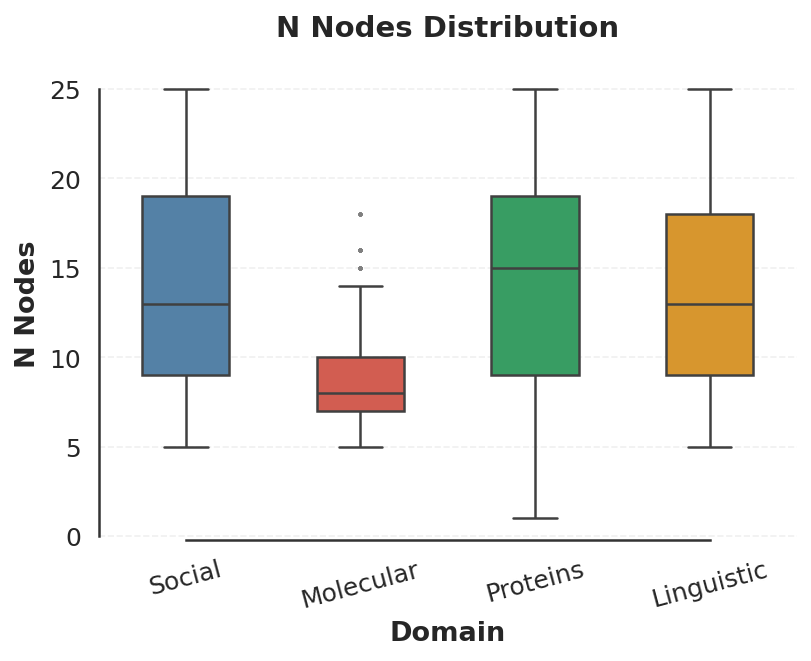

📸 Figure saved: boxplot_n_edges.png (600 DPI) / .pdf


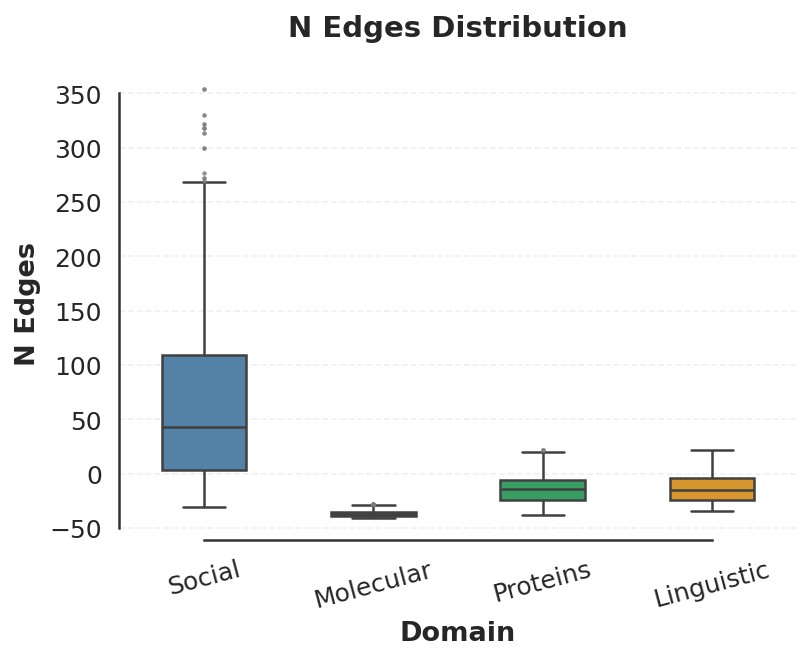

📸 Figure saved: boxplot_density.png (600 DPI) / .pdf


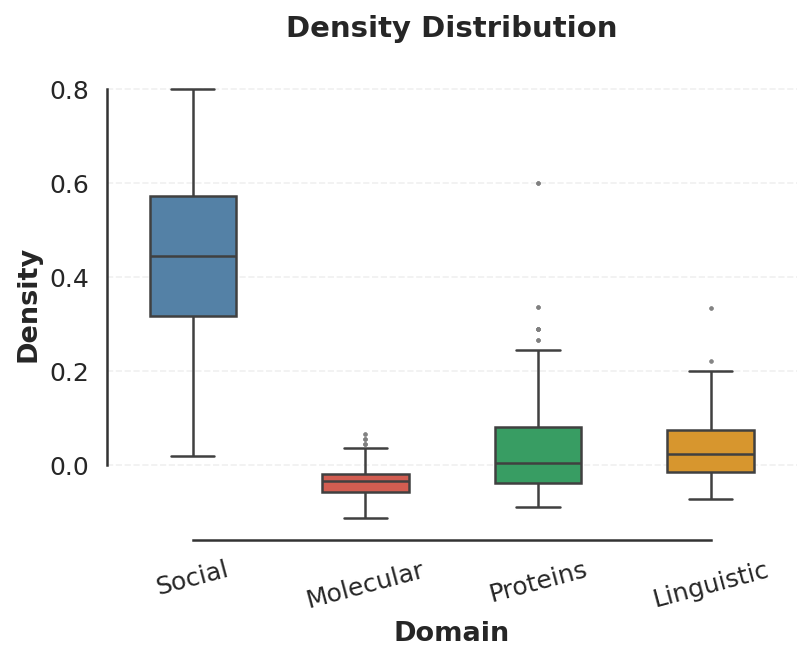

📸 Figure saved: boxplot_avg_clustering.png (600 DPI) / .pdf


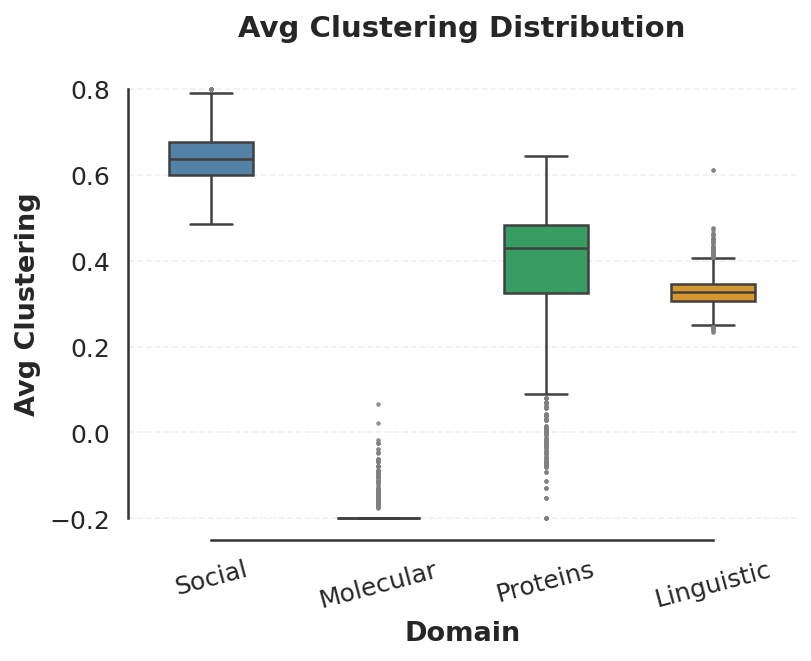

📸 Figure saved: boxplot_transitivity.png (600 DPI) / .pdf


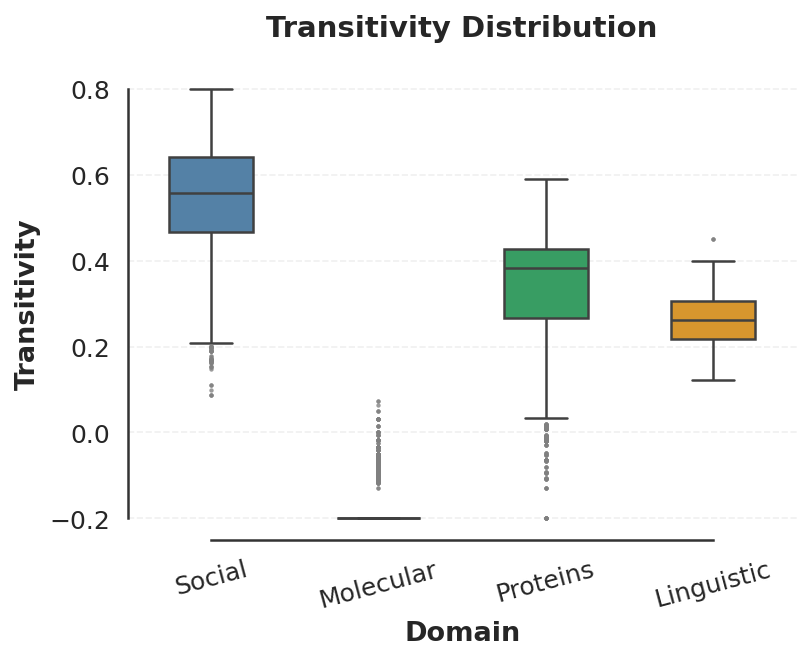

📸 Figure saved: boxplot_assortativity.png (600 DPI) / .pdf


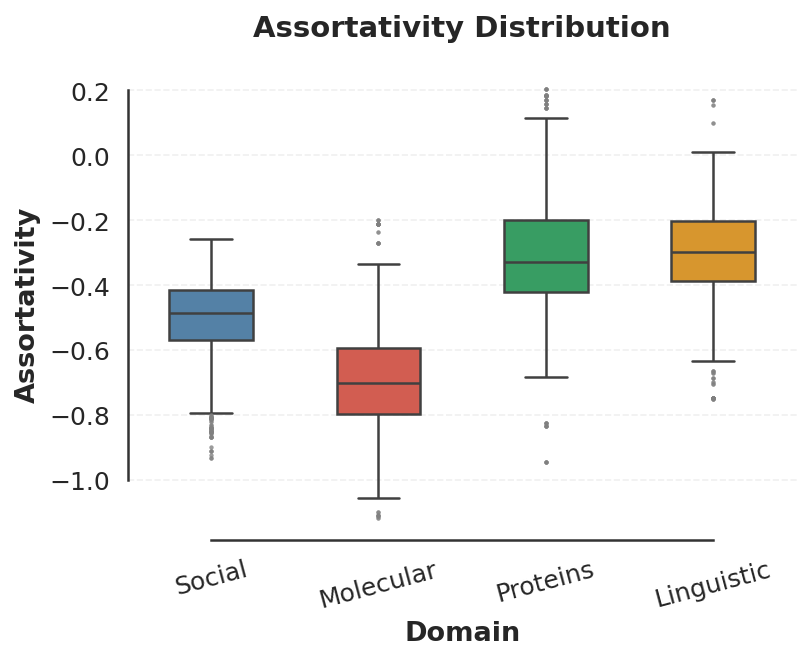

📸 Figure saved: boxplot_efficiency.png (600 DPI) / .pdf


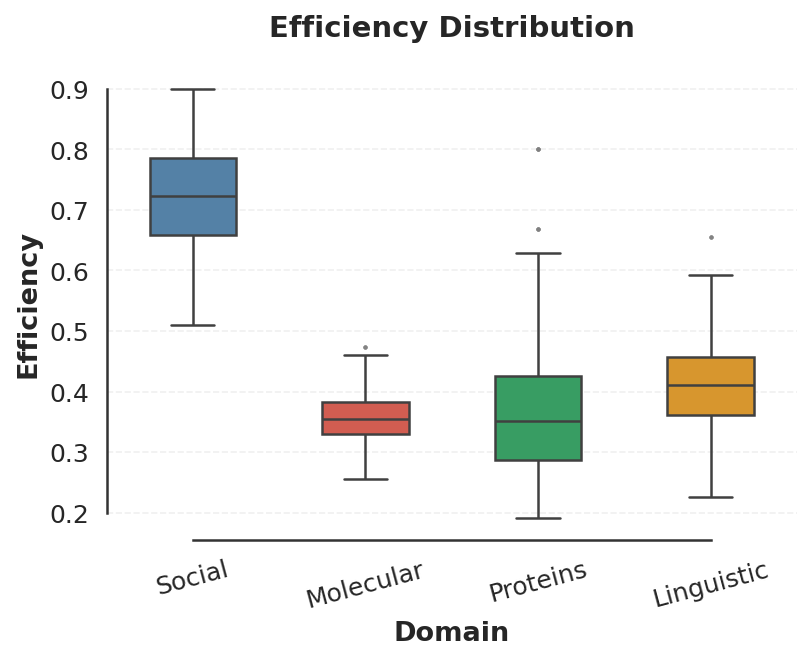

📸 Figure saved: boxplot_avg_shortest_path.png (600 DPI) / .pdf


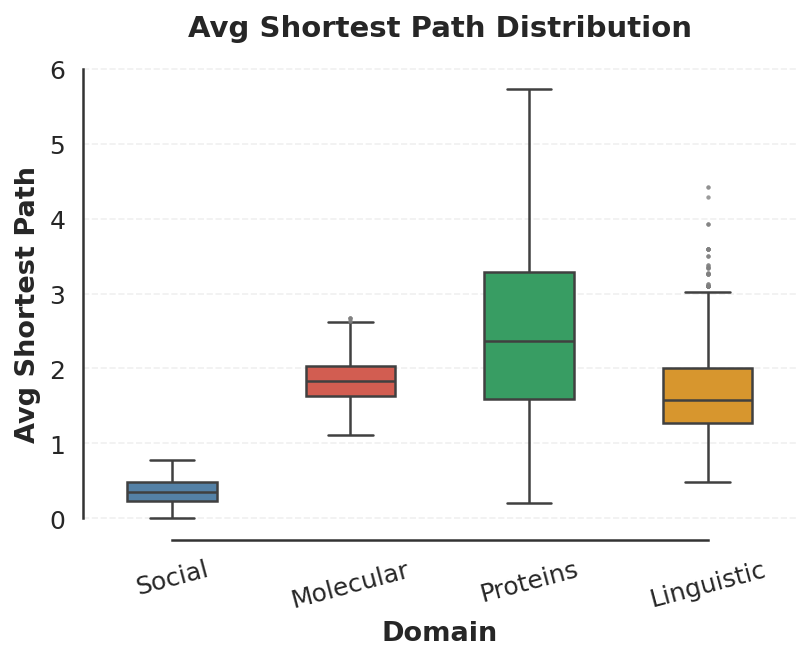

📸 Figure saved: boxplot_diameter.png (600 DPI) / .pdf


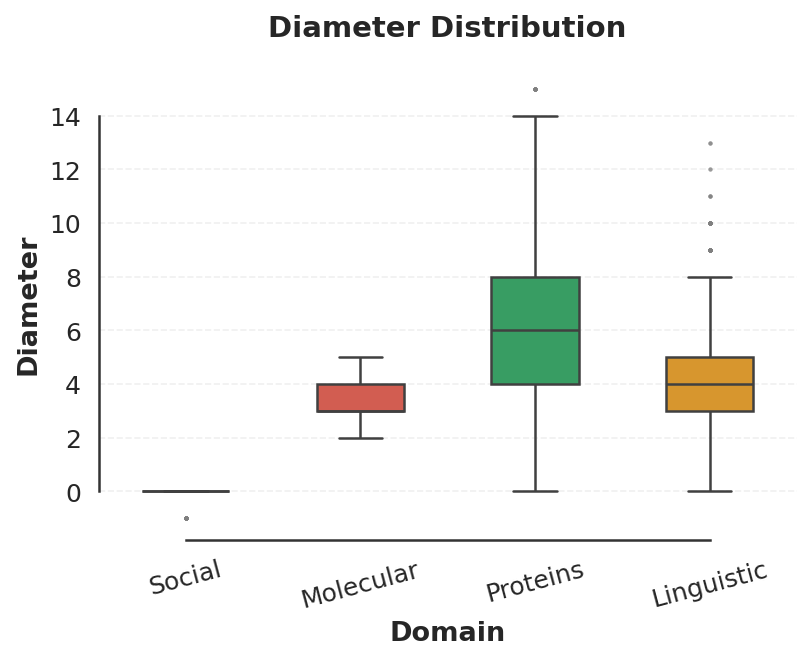

📸 Figure saved: boxplot_spectral_radius.png (600 DPI) / .pdf


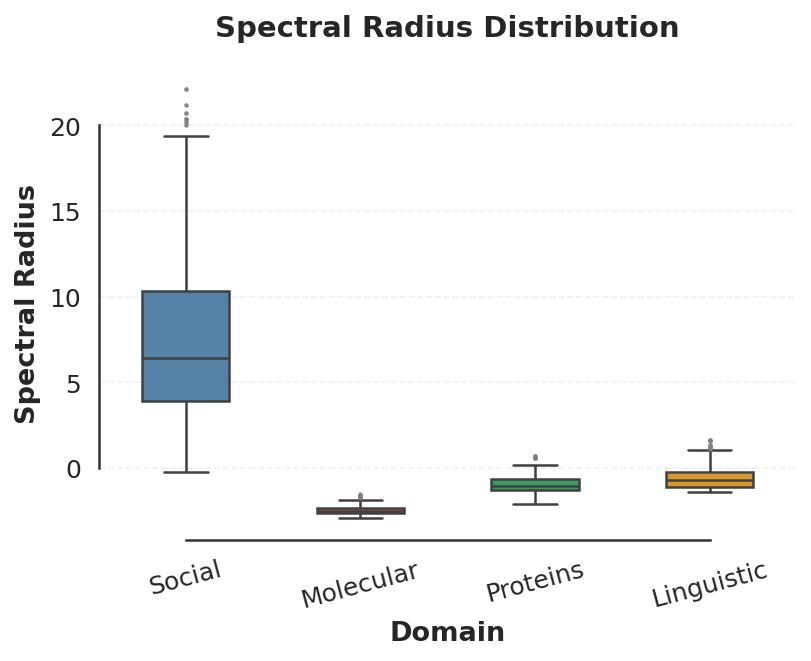

📸 Figure saved: boxplot_lambda_2.png (600 DPI) / .pdf


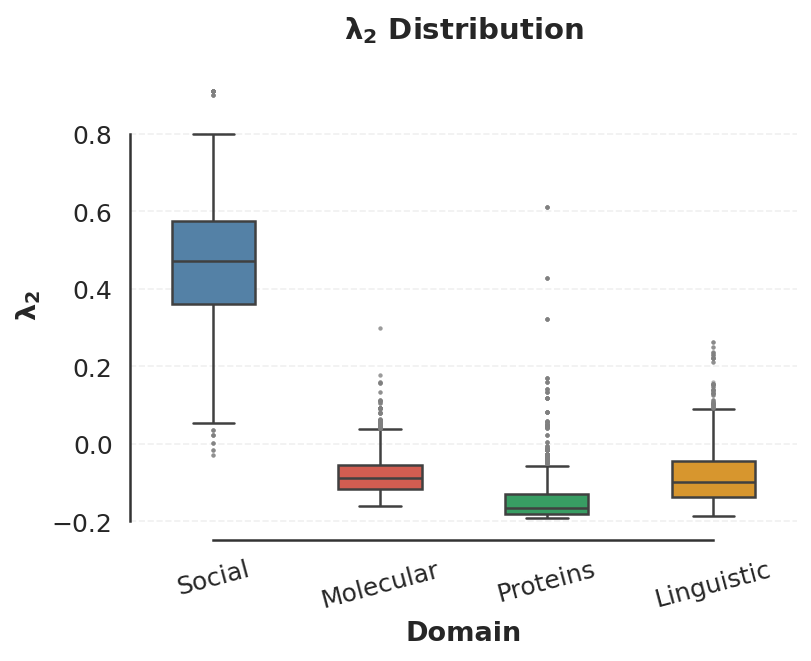

📸 Figure saved: boxplot_modularity.png (600 DPI) / .pdf


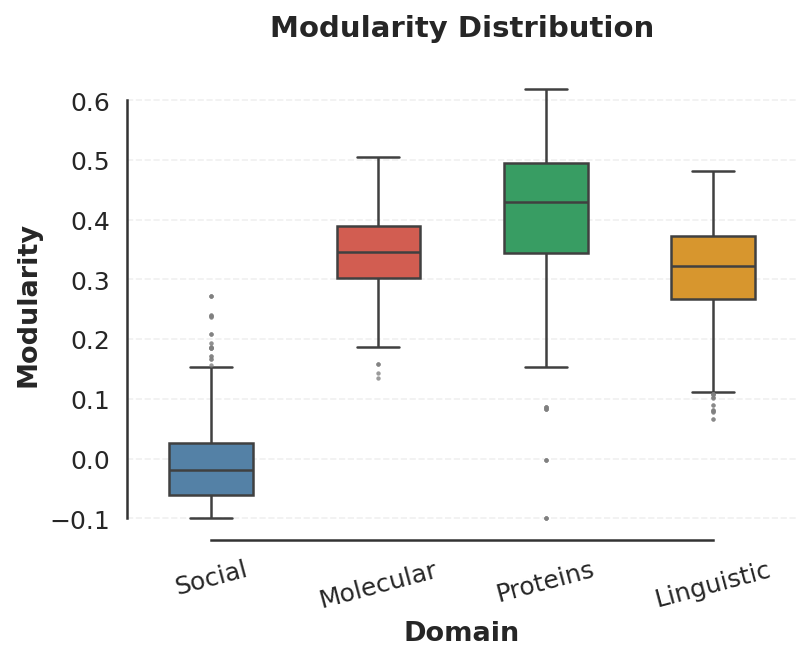


📈 Averaged Structural Feature Summary Statistics (Mean over 10 Seeds):


Metric  Social_mean  Social_std  Social_min  Social_max  \
0             n_nodes       18.757       5.903      10.000      30.000   
1             n_edges      113.901      73.278      19.000     404.000   
2             density        0.645       0.171       0.219       1.000   
3      avg_clustering        0.842       0.059       0.685       1.000   
4        transitivity        0.744       0.138       0.287       1.000   
5       assortativity       -0.302       0.119      -0.731      -0.057   
6          efficiency        0.823       0.085       0.610       1.000   
7   avg_shortest_path        1.355       0.171       1.000       1.781   
8            diameter        1.990       0.101       1.000       2.000   
9     spectral_radius       12.283       4.324       4.785      27.134   
10           lambda_2        0.664       0.155       0.170       1.111   
11         modularity        0.089       0.065       0.000       0.372   

    Molecular_mean  Molecular_std  Molecular_min  Molecular_max  \
0           13.337          2.435         10.000         23.000   
1           13.137          2.444          9.000         22.000   
2            0.166          0.032          0.087          0.267   
3            0.013          0.031          0.000          0.267   
4            0.026          0.053          0.000          0.273   
5           -0.492          0.151         -0.918          0.000   
6            0.456          0.038          0.356          0.574   
7            2.837          0.282          2.111          3.676   
8            5.282          0.739          4.000          7.000   
9            2.558          0.211          2.074          3.470   
10           0.124          0.057          0.040          0.500   
11           0.448          0.063          0.235          0.605   

    Proteins_mean  Proteins_std  Proteins_min  Proteins_max  Linguistic_mean  \
0          19.273         5.904         6.000        30.000           18.715   
1          36.065        12.020        12.000        72.000           36.613   
2           0.230         0.088         0.111         0.800            0.234   
3           0.576         0.168         0.000         0.844            0.531   
4           0.529         0.146         0.000         0.789            0.457   
5          -0.104         0.175        -0.744         0.405           -0.106   
6           0.463         0.100         0.291         0.900            0.511   
7           3.514         1.140         1.200         6.731            2.694   
8           8.116         3.242         2.000        17.000            6.140   
9           4.040         0.451         2.918         5.732            4.414   
10          0.059         0.074         0.008         0.810            0.117   
11          0.519         0.105         0.000         0.719            0.417   

    Linguistic_std  Linguistic_min  Linguistic_max  
0            5.316          10.000          30.000  
1           12.686          16.000          72.000  
2            0.062           0.129           0.533  
3            0.039           0.433           0.812  
4            0.053           0.321           0.649  
5            0.126          -0.549           0.370  
6            0.068           0.326           0.756  
7            0.586           1.489           5.428  
8            1.906           2.000          15.000  
9            0.574           3.591           6.629  
10           0.073           0.015           0.464  
11           0.073           0.166           0.582

💾 Saved: structural_summary_stats.csv (Aggregated N=20000)

✅ MODULE 2 completed on GPU NVIDIA A100-PCIE-40GB.


In [2]:
# ==============================================================================
# === X-CDTL Framework | Module 2: Topological Profiling & Ensemble Variance ===
# ==============================================================================
# Researcher: Daniele Caligiore
# Affiliation: CNR - Italian National Research Council (ISTC)
# Version: 2.0 (Jan 2026)
# ------------------------------------------------------------------------------
# DESCRIPTION:
# This module performs high-resolution statistical profiling of structural 
# feature distributions across the four investigated scientific domains. 
# It characterizes the morphological heterogeneity and intrinsic variability 
# within each graph ensemble, providing the empirical foundation for 
# cross-domain separability.
#
# CORE PIPELINE:
# 1. Stochastic sampling from pre-calculated graph pools across 10 seeds.
# 2. Aggregation of 20,000 observations (5,000 per domain) in long-format.
# 3. High-fidelity visualization of topological fingerprints via boxplots.
# 4. Export of publication-ready graphics (600 DPI PNG and Vector PDF).
# 5. Extraction of ensemble-level descriptive statistics (μ, σ, range).
# ------------------------------------------------------------------------------

import torch, os, subprocess
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

# ------------------------------------------------------------
# === GPU CHECK & MONITORING ===
# ------------------------------------------------------------
def find_free_gpu():
    try:
        smi_output = subprocess.check_output(
            "nvidia-smi --query-gpu=index,memory.free --format=csv,noheader,nounits",
            shell=True
        ).decode("utf-8").strip().split("\n")
        gpus = [(int(line.split(",")[0]), int(line.split(",")[1])) for line in smi_output]
        gpus.sort(key=lambda x: x[1], reverse=True)
        return str(gpus[0][0])
    except Exception as e:
        print("⚠️ No GPU found or nvidia-smi unavailable:", e)
        return None

gpu_index = find_free_gpu()
if torch.cuda.is_available():
    device = torch.device("cuda")
    device_name = torch.cuda.get_device_name(0)
    print(f"🖥️ GPU available: {device_name}")
else:
    device = torch.device("cpu")
    print("⚠️ GPU not available — MODULE 2 will run on CPU.")

# ------------------------------------------------------------
# === INPUT DATA VALIDATION (POOL-BASED) ===
# ------------------------------------------------------------
# Check pools from MODULE 1
required_pools = ["pool_ego_metrics", "pool_mol_metrics", "pool_prot_metrics", "pool_lang_metrics"]
for name in required_pools:
    if name not in globals():
        raise RuntimeError(f"❌ Missing pool: {name}. Please run the optimized MODULE 1 first.")


# Color coerence for domains
DOMAIN_COLORS = {
    "Social": "#4682B4",     # Steel Blue
    "Molecular": "#E74C3C",  # Alizarin/Coral
    "Proteins": "#27AE60",   # Emerald Green
    "Linguistic": "#F39C12"  # Goldenrod
}

METRICS = [
    "n_nodes","n_edges","density","avg_clustering","transitivity",
    "assortativity","efficiency","avg_shortest_path","diameter",
    "spectral_radius","lambda_2","modularity"
]

all_seed_data = []

print(f"🔄 Aggregating structural features sampling from pools over {len(target_seeds)} seeds...")

for s in target_seeds:
    df_soc_s = pool_ego_metrics.sample(500, random_state=s).copy(); df_soc_s["Domain"] = "Social"
    df_mol_s = pool_mol_metrics.sample(500, random_state=s).copy(); df_mol_s["Domain"] = "Molecular"
    df_prot_s = pool_prot_metrics.sample(500, random_state=s).copy(); df_prot_s["Domain"] = "Proteins"
    df_lang_s = pool_lang_metrics.sample(500, random_state=s).copy(); df_lang_s["Domain"] = "Linguistic"
    
    all_seed_data.append(pd.concat([df_soc_s, df_mol_s, df_prot_s, df_lang_s], ignore_index=True))

df_all_long = pd.concat(all_seed_data, ignore_index=True)

for c in METRICS:
    if c in df_all_long.columns:
        df_all_long[c] = pd.to_numeric(df_all_long[c], errors="coerce")

# ------------------------------------------------------------
# === VISUALIZATION CONFIGURATION ===
# ------------------------------------------------------------
sns.set_theme(style="white", context="paper") 
plt.rcParams.update({
    "font.family": "sans-serif",
    "axes.edgecolor": "#333333",
    "axes.linewidth": 1.2,
    "axes.labelweight": "bold",
    "xtick.major.width": 1.2,
    "ytick.major.width": 1.2,
    "figure.dpi": 150
})

# ------------------------------------------------------------
# === HIGH-RES FIGURE EXPORT ===
# ------------------------------------------------------------
output_dir = "figures_nature"
os.makedirs(output_dir, exist_ok=True)

def save_highres(filename_base):
    """Saves high-quality figures for publication (PNG 600 DPI, PDF vector)."""
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f"{filename_base}.png"), dpi=600, bbox_inches="tight")
    plt.savefig(os.path.join(output_dir, f"{filename_base}.pdf"), bbox_inches="tight", transparent=True)
    print(f"📸 Figure saved: {filename_base}.png (600 DPI) / .pdf")

# ------------------------------------------------------------
# === FUNCTION: BOXPLOT GENERATION ===
# ------------------------------------------------------------
def plot_metric_boxplots(df, metrics_to_plot):
    domain_order = ["Social", "Molecular", "Proteins", "Linguistic"]
    
    for metric in metrics_to_plot:
        if metric not in df.columns: continue
        
        fig, ax = plt.subplots(figsize=(5.5, 4.5))
        
        sns.boxplot(
            data=df, x="Domain", y=metric, 
            order=domain_order,
            palette=DOMAIN_COLORS, 
            width=0.5,           
            linewidth=1.2,       
            fliersize=2,         
            flierprops={"markerfacecolor": "gray", "alpha": 0.4, "markeredgecolor": "none"},
            ax=ax
        )
        
        if metric == "lambda_2":
            display_name = r"$\mathbf{\lambda_2}$"
        else:
            display_name = metric.replace('_',' ').title()
        
        ax.set_title(f"{display_name} Distribution", pad=15, fontsize=14, fontweight="bold")
        ax.set_ylabel(display_name, fontsize=13, fontweight="bold")
        ax.set_xlabel("Domain", fontsize=13, fontweight="bold")
        
        ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation=15)
        ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)

        ax.yaxis.grid(True, linestyle='--', alpha=0.3)
        sns.despine(trim=True) 
        
        save_highres(f"boxplot_{metric}")
        plt.show()

# ------------------------------------------------------------
# === EXECUTION: BOXPLOTS & STATISTICS ===
# ------------------------------------------------------------
print(f"\n📊 Generating structural boxplots (pooled data from {len(target_seeds)} seeds)...")
plot_metric_boxplots(df_all_long, METRICS)

summary_rows = []
for metric in METRICS:
    if metric not in df_all_long.columns: continue
    row = {"Metric": metric}
    for domain in df_all_long["Domain"].unique():
        vals = df_all_long.loc[df_all_long["Domain"] == domain, metric].dropna()
        row[f"{domain}_mean"] = vals.mean()
        row[f"{domain}_std"]  = vals.std()
        row[f"{domain}_min"]  = vals.min()
        row[f"{domain}_max"]  = vals.max()
    summary_rows.append(row)

df_stats = pd.DataFrame(summary_rows)
pd.set_option("display.float_format", "{:.3f}".format)

print(f"\n📈 Averaged Structural Feature Summary Statistics (Mean over {len(target_seeds)} Seeds):")
display(df_stats)

df_stats.to_csv(os.path.join(output_dir, "structural_summary_stats.csv"), index=False)
print(f"💾 Saved: structural_summary_stats.csv (Aggregated N={len(df_all_long)})")

if device.type == "cuda":
    print(f"\n✅ MODULE 2 completed on GPU {device_name}.")
else:
    print("\n✅ MODULE 2 completed on CPU.")

# MODULE 3 — Manifold Synchronization & Transfer Resilience
- **Parsimony vs. Redundancy**: Comparative benchmarking of optimized structural anchors (Top Feats) against full high-dimensional characterization (All Feats) to evaluate feature pollution mitigation.
- **Stress-Test Grid Analysis**: Quantifying decision robustness across 90 realizations spanning varying target data scarcity ($\alpha$) and stochastic corruption ($\eta$) levels.
- **Regularization & Rescue**: Identification of the "Diversity-Driven Rescue Effect" and synergistic gains (TGI) in high-noise regimes using unsupervised anomaly detection.
- **Numerical Synchronization**: GPU-accelerated PCA-SVD alignment to neutralize parameter-scale discrepancies and ensure stable cross-domain manifold mapping.

🚀 Memory status at start: 17777 MB free
⚠️ cuML not available — falling back to scikit-learn.

🚀 Running Transfer Grid Analysis (10 seeds x 3 fracs x 3 noise levels)...
   • Processing: Social → Molecular


   • Processing: Social → Proteins
   • Processing: Social → Linguistic
   • Processing: Molecular → Social
   • Processing: Molecular → Proteins
   • Processing: Molecular → Linguistic
   • Processing: Proteins → Social
   • Processing: Proteins → Molecular
   • Processing: Proteins → Linguistic
   • Processing: Linguistic → Social
   • Processing: Linguistic → Molecular
   • Processing: Linguistic → Proteins

🌍 GLOBAL PERFORMANCE RANKING (Averaged over 10 seeds):


roc_auc    ap    f1  GlobalRank
Scenario                                              
No Transfer (Aligned)    0.882 0.539 0.385       1.306
Transfer (Aligned)       0.840 0.468 0.344       1.694

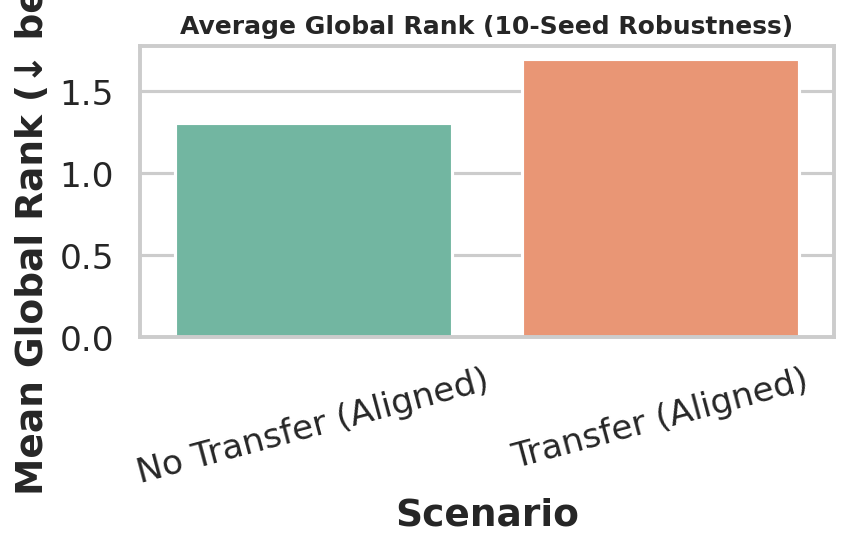


✅ Module 3 completed. Memory remaining: 17777 MB free

✅ MODULE 3 Completed. Analysis robustly averaged over 10 realizations.


In [ ]:
# ==============================================================================
# === X-CDTL Framework | Module 3: Manifold Alignment & Transfer Robustness ===
# ==============================================================================
# Researcher: Daniele Caligiore
# Affiliation: CNR - Italian National Research Council (ISTC)
# Version: 2.0 (Jan 2026)
# ------------------------------------------------------------------------------
# DESCRIPTION:
# This module executes the core transfer learning experiments by performing 
# cross-domain manifold synchronization and unsupervised anomaly detection. 
# It evaluates decision robustness across a multi-factor grid (10 seeds x 
# 3 scarcity levels x 3 noise intensities) to characterize the functional 
# boundaries of universal structural anchors.
#
# CORE PIPELINE:
# 1. Manifold synchronization via GPU-accelerated PCA-SVD alignment.
# 2. Ground-truth generation using a composite structural extremeness index.
# 3. High-dimensional stress testing across data scarcity (α) and noise (η).
# 4. Benchmarking: Aligned Target-Only Baseline vs. X-CDTL Knowledge Transfer.
# 5. Quantification of synergistic gains (TGI) and global scenario ranking.
# ------------------------------------------------------------------------------

from sklearn.preprocessing import StandardScaler
import torch, os, subprocess, importlib
import numpy as np, pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, average_precision_score, f1_score
from sklearn.ensemble import IsolationForest
from scipy.stats import spearmanr
import scikit_posthocs as sp
import seaborn as sns
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# === GPU CHECK & SELECTION ===
# ------------------------------------------------------------
if torch.cuda.is_available():
    f_mem, t_mem = torch.cuda.mem_get_info()
    print(f"🚀 Memory status at start: {f_mem//1024**2} MB free")

def setup_gpu():
    try:
        smi_output = subprocess.check_output(
            "nvidia-smi --query-gpu=index,name,memory.free,memory.total --format=csv,noheader,nounits",
            shell=True
        ).decode("utf-8").strip().split("\n")
        gpus = [line.split(",") for line in smi_output]
        gpus = [(int(i), n.strip(), int(f), int(t)) for i, n, f, t in gpus]
        gpus.sort(key=lambda x: x[2], reverse=True)
        os.environ["CUDA_VISIBLE_DEVICES"] = str(gpus[0][0])
        return torch.device("cuda")
    except:
        return torch.device("cpu")

device = setup_gpu()
use_gpu = device.type == "cuda"

try:
    from cuml.ensemble import IsolationForest as cuIsolationForest
    use_cuml = True
    print("🚀 cuML IsolationForest available — native CUDA acceleration enabled.")
except ImportError:
    use_cuml = False
    print("⚠️ cuML not available — falling back to scikit-learn.")

# ------------------------------------------------------------
# === ROBUST ALIGNMENT FALLBACK ===
# ------------------------------------------------------------
def align_domains_robust(Xs, Xt, method="pca-alignment", n_components=5):
    # Transductive Alignment: Use Source + Full Target Pool to define the geometry
    if method == "pca-alignment":
        pca = PCA(n_components=n_components, random_state=42)
        combined = np.vstack([Xs, Xt])
        pca.fit(combined)
        Z = pca.transform(combined)
        
        Xs_pca = pd.DataFrame(Z[:len(Xs)], columns=[f"PC{i+1}" for i in range(n_components)])
        Xt_pca = pd.DataFrame(Z[len(Xs):], columns=[f"PC{i+1}" for i in range(n_components)])
        return Xs_pca, Xt_pca
    return Xs, Xt

# ------------------------------------------------------------
# === GLOBAL EXPERIMENT SETTINGS (DYNAMIC FROM MODULE 1) ===
# ------------------------------------------------------------
seeds_to_run = target_seeds 
low_data_fracs = [0.1, 0.5, 0.9]        
noise_levels = [0.1, 0.5, 0.9]          
missing_frac = 0.05
contamination = 0.10
anomaly_percentile = 90
n_trees = 256

pool_map = {
    "df_qm9": "pool_mol_metrics",
    "df_ego": "pool_ego_metrics",
    "df_lang": "pool_lang_metrics",
    "df_prot": "pool_prot_metrics"
}

domain_pairs = [
    # Source: Social
    ("Social → Molecular", "df_ego", "df_qm9"),
    ("Social → Proteins", "df_ego", "df_prot"),
    ("Social → Linguistic", "df_ego", "df_lang"),
    # Source: Molecular
    ("Molecular → Social", "df_qm9", "df_ego"),
    ("Molecular → Proteins", "df_qm9", "df_prot"),
    ("Molecular → Linguistic", "df_qm9", "df_lang"),
    # Source: Proteins
    ("Proteins → Social", "df_prot", "df_ego"),
    ("Proteins → Molecular", "df_prot", "df_qm9"),
    ("Proteins → Linguistic", "df_prot", "df_lang"),
    # Source: Linguistic
    ("Linguistic → Social", "df_lang", "df_ego"),
    ("Linguistic → Molecular", "df_lang", "df_qm9"),
    ("Linguistic → Proteins", "df_lang", "df_prot")
]

# ------------------------------------------------------------
# === UTILITIES (CORRUPT & METRICS) ===
# ------------------------------------------------------------
def corrupt_dataframe(df, noise_std=0.0, missing_frac=0.0, rng=None):
    dfc = df.copy().astype(float)
    if noise_std > 0:
        dfc += rng.normal(0, noise_std * (dfc.std() + 1e-6), size=dfc.shape)
    if missing_frac > 0:
        mask = rng.rand(*dfc.shape) < missing_frac
        dfc[mask] = np.nan
    return pd.DataFrame(SimpleImputer(strategy="median").fit_transform(dfc), columns=df.columns)

def safe_metrics(y_true, scores, y_pred):
    out = {"roc_auc": np.nan, "ap": np.nan, "f1": np.nan}
    if len(np.unique(y_true)) > 1:
        try: out["roc_auc"] = roc_auc_score(y_true, scores)
        except: pass
        try: out["ap"] = average_precision_score(y_true, scores)
        except: pass
    try: out["f1"] = f1_score(y_true, y_pred)
    except: pass
    return out

# ------------------------------------------------------------
# === CORE EXPERIMENT LOOP (POOL-AWARE) ===
# ------------------------------------------------------------
def run_transfer_aligned_grid_optimized(src_pool_name, tgt_pool_name, domain_label):
    feats_row = df_pairwise_transfer[df_pairwise_transfer["DomainPair"] == domain_label]
    feats = feats_row["top_transferable_feats"].iloc[0] if not feats_row.empty else transferable_features

    src_pool = globals()[pool_map[src_pool_name]][feats]
    tgt_pool = globals()[pool_map[tgt_pool_name]][feats]

    IForestClass = cuIsolationForest if (use_cuml and use_gpu) else IsolationForest
    
    results = []
    
    # GRID: Seeds x Data Fractions x Noise Levels
    for s in seeds_to_run:
        # 1. Sample raw data from pools (500 samples per domain)
        Xs_raw = src_pool.sample(500, random_state=s)
        Xt_raw = tgt_pool.sample(500, random_state=s)
        
        # 2. CROSS-DOMAIN STANDARDIZATION
        # Scale Target based on Source stats (Standard Transfer Learning)
        imp = SimpleImputer(strategy="median").fit(Xs_raw)
        scaler = StandardScaler().fit(imp.transform(Xs_raw))
        
        Xs_raw_s = pd.DataFrame(scaler.transform(imp.transform(Xs_raw)), columns=feats)
        Xt_raw_s = pd.DataFrame(scaler.transform(imp.transform(Xt_raw)), columns=feats)

        # 3. GLOBAL MANIFOLD ALIGNMENT (Transductive UDA)
        # Use the whole 500-sample Target pool to ensure PCA stability
        Xs_aligned, Xt_aligned = align_domains_robust(Xs_raw_s, Xt_raw_s, n_components=5)

        # 4. GLOBAL GROUND TRUTH GENERATION
        # Define anomalies based on the whole Target Aligned Pool
        z_scores = np.abs((Xt_aligned - Xt_aligned.mean()) / (Xt_aligned.std() + 1e-12))
        z_sum = z_scores.sum(axis=1)
        y_t_global = (z_sum > np.percentile(z_sum, anomaly_percentile)).astype(int)

        # 5. NESTED GRID: Data Scarcity (alpha) x Noise (eta)
        for frac in low_data_fracs:
            for nl in noise_levels:
                rng = np.random.RandomState(s)
                
                # 6. INDUCTIVE MODEL SPLIT (Rigor: Isolation of Evaluation data)
                # Split the ALIGNED data and GLOBAL labels into train and test
                X_train, X_test, y_train, y_test = train_test_split(
                    Xt_aligned, y_t_global, train_size=frac, stratify=y_t_global, random_state=s)
                
                # Apply Stress-test: Noise and missing data to the training fold ONLY
                X_train_c = corrupt_dataframe(X_train, noise_std=nl, missing_frac=missing_frac, rng=rng)
                
                scenarios = {
                    "No Transfer (Aligned)": X_train_c,
                    "Transfer (Aligned)": pd.concat([Xs_aligned, X_train_c])
                }
                
                for sc, X_tr in scenarios.items():
                    clf = IForestClass(n_estimators=n_trees, contamination=contamination, random_state=s)
                    clf.fit(X_tr)
                    
                    # 7. EVALUATION: Predict on the "blind" held-out aligned samples
                    scores = -clf.decision_function(X_test)
                    y_pred = (clf.predict(X_test) == -1).astype(int)
                    
                    metrics_result = safe_metrics(y_test, scores, y_pred)
                    metrics_result.update({
                        "DomainPair": domain_label, "Scenario": sc, "Seed": s,
                        "low_data_frac": frac, "noise_level": nl
                    })
                    results.append(metrics_result)
                    
    return pd.DataFrame(results)

# ------------------------------------------------------------
# === EXECUTION, AGGREGATION AND PLOTTING ===
# ------------------------------------------------------------
print(f"\n🚀 Running Transfer Grid Analysis ({len(seeds_to_run)} seeds x 3 fracs x 3 noise levels)...")
all_res = []
for label, src, tgt in domain_pairs:
    print(f"   • Processing: {label}")
    all_res.append(run_transfer_aligned_grid_optimized(src, tgt, label))

df_aligned = pd.concat(all_res, ignore_index=True)

summary_global = df_aligned.groupby(["DomainPair", "Scenario"])[["roc_auc", "ap", "f1"]].mean().reset_index()

for m in ["roc_auc", "ap", "f1"]:
    summary_global[m + "_rank"] = summary_global.groupby("DomainPair")[m].rank(ascending=False)

summary_global["GlobalRank"] = summary_global[[m + "_rank" for m in ["roc_auc", "ap", "f1"]]].mean(1)
ranks_table = summary_global.groupby("Scenario")[["roc_auc", "ap", "f1", "GlobalRank"]].mean().sort_values("GlobalRank").round(3)

print(f"\n🌍 GLOBAL PERFORMANCE RANKING (Averaged over {len(seeds_to_run)} seeds):")
display(ranks_table)

output_dir = "figures_nature"
os.makedirs(output_dir, exist_ok=True)
sns.set_theme(style="whitegrid", context="talk")

fig, ax = plt.subplots(figsize=(6, 4))
sns.barplot(data=ranks_table.reset_index(), x="Scenario", y="GlobalRank", palette="Set2", ax=ax)
ax.set_title(f"Average Global Rank ({len(seeds_to_run)}-Seed Robustness)", fontsize=12, fontweight="semibold")
ax.set_ylabel("Mean Global Rank (↓ better)")
plt.xticks(rotation=15)
plt.tight_layout()

plt.savefig(os.path.join(output_dir, "global_rank_scenarios.pdf"), bbox_inches="tight")
plt.show()

# Export CSV
df_aligned.to_csv(os.path.join(output_dir, "transfer_results_robust.csv"), index=False)

if torch.cuda.is_available():
    f_mem, t_mem = torch.cuda.mem_get_info()
    print(f"\n✅ Module 3 completed. Memory remaining: {f_mem//1024**2} MB free")

print(f"\n✅ MODULE 3 Completed. Analysis robustly averaged over {len(seeds_to_run)} realizations.")

# MODULE 4 — Predictive Calibration & Directed Homology
- **Feature Parsimony Validation**: Benchmarking the stability of optimized structural anchors (Top Feats) against high-dimensional redundancy (All Feats).
- **Calibration Profiling**: Correlating the Global Consensus $IIT_{score, G}$ with the Transfer Gain Index (TGI) to characterize the "Diversity-Driven Rescue Effect."
- **Predictive Power**: Identification of the framework predictive reliability through linear regression analysis across the 10-seed experimental grid.
- **Manifold Mapping**: Quantification of directed structural homology and metric proximity between source and target manifolds after PCA-SVD alignment.


📊 Running MODULE 4 — GPU-Accelerated Transfer Robustness & Structural Commonality
🚀 Memory status at start: 17777 MB free
✅ GPU active: NVIDIA A100-PCIE-40GB
🔁 Running GPU Variant: Social → Molecular (Top vs All Feats)
🔁 Running GPU Variant: Social → Proteins (Top vs All Feats)
🔁 Running GPU Variant: Social → Linguistic (Top vs All Feats)
🔁 Running GPU Variant: Molecular → Social (Top vs All Feats)
🔁 Running GPU Variant: Molecular → Proteins (Top vs All Feats)
🔁 Running GPU Variant: Molecular → Linguistic (Top vs All Feats)
🔁 Running GPU Variant: Proteins → Social (Top vs All Feats)
🔁 Running GPU Variant: Proteins → Molecular (Top vs All Feats)
🔁 Running GPU Variant: Proteins → Linguistic (Top vs All Feats)
🔁 Running GPU Variant: Linguistic → Social (Top vs All Feats)
🔁 Running GPU Variant: Linguistic → Molecular (Top vs All Feats)
🔁 Running GPU Variant: Linguistic → Proteins (Top vs All Feats)

🌍 GLOBAL PERFORMANCE RANKING (Averaged over Grid):


roc_auc    ap    f1  GlobalRank
FeatureType Scenario                                                         
All         No Transfer (Aligned, All Feats)    0.870 0.524 0.357       1.278
            Transfer (Aligned, All Feats)       0.827 0.462 0.336       1.722
Top         No Transfer (Aligned, Top Feats)    0.882 0.539 0.385       1.306
            Transfer (Aligned, Top Feats)       0.840 0.468 0.344       1.694


📊 Generating regression plots...
📸 Figure saved: regression_tgi_vs_iitscore.png (600 DPI) / .pdf


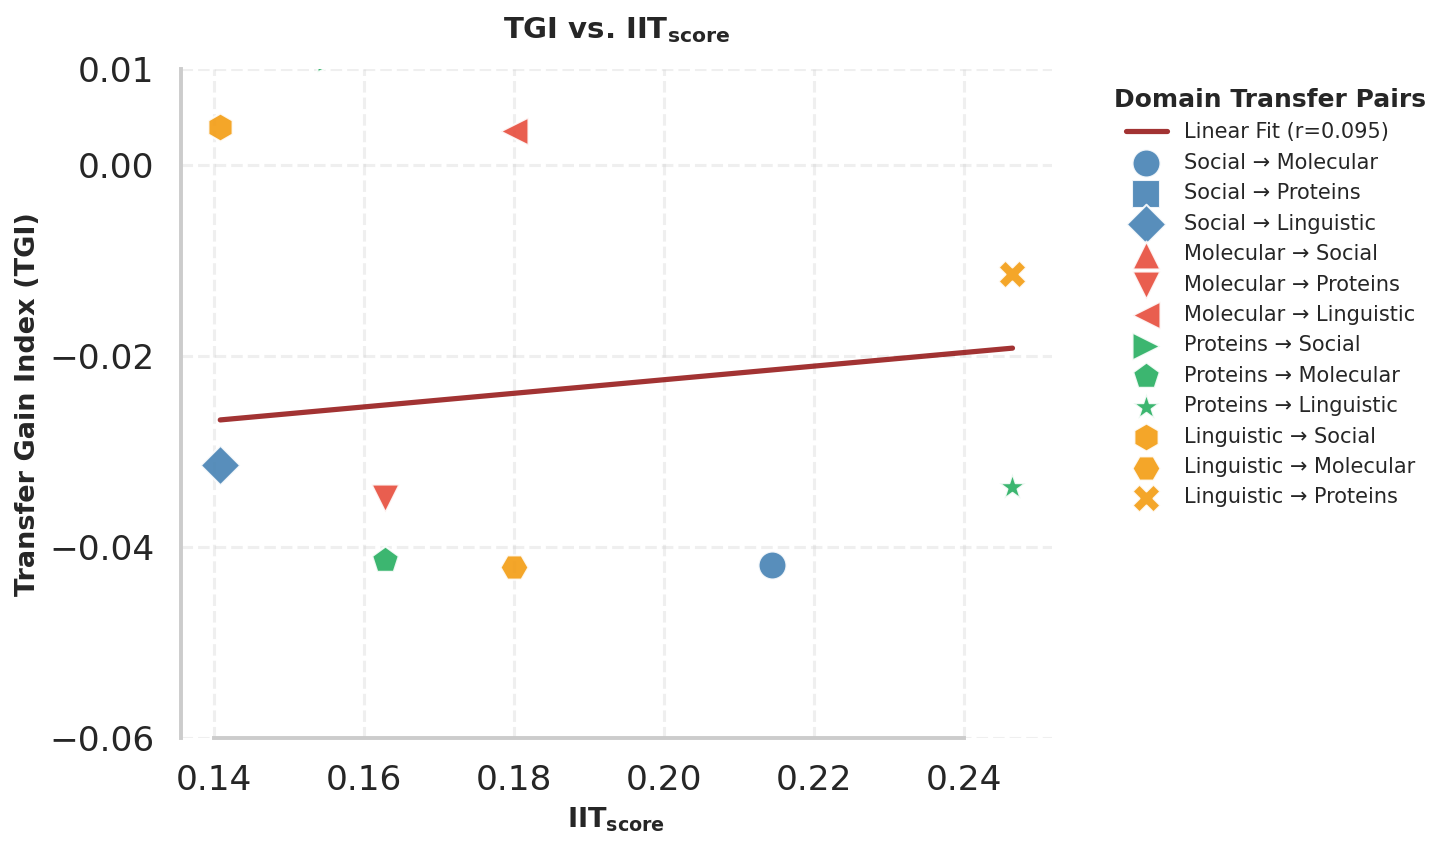


✅ MODULE 4 completed. Memory remaining: 18409 MB free

✅ MODULE 4 Completed. Baseline averaged over target_seeds: [1, 24, 42, 50, 123, 501, 700, 800, 920, 999]


In [ ]:
# ==============================================================================
# === X-CDTL Framework | Module 4: Predictive Validation & Homology Metrics ===
# ==============================================================================
# Researcher: Daniele Caligiore
# Affiliation: CNR - Italian National Research Council (ISTC)
# Version: 3.0 (Feb 2026)
# ------------------------------------------------------------------------------
# DESCRIPTION:
# This module validates the predictive capacity of the X-CDTL framework by 
# quantifying the relationship between theoretical manifold compatibility 
# (IIT score) and realized functional effectiveness (TGI). It benchmarks the 
# parsimonious "Top Feats" configuration against high-dimensional redundancy 
# and formalizes the association between directed structural homology and 
# transfer performance.
#
# CORE PIPELINE:
# 1. Comparative Grid Analysis: Evaluating the robustness of stable structural 
#    anchors versus unrefined topological feature sets across all seeds.
# 2. Directed Homology Computation: GPU-accelerated calculation of the pairwise 
#    IIT score (integrating rank-consistency and metric proximity).
# 3. Correlation Analysis: Linear regression of TGI vs. IIT score to identify 
#    the framework predictive reliability (Calibration Plot).
# 4. Visualization: High-fidelity regression profiling with standardized Y-axis 
#    scaling to ensure rigorous cross-regime comparability.
# ------------------------------------------------------------------------------

print("\n📊 Running MODULE 4 — GPU-Accelerated Transfer Robustness & Structural Commonality")

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler 

import torch, numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt, os
from scipy.stats import linregress
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from matplotlib.ticker import MaxNLocator

# ------------------------------------------------------------
# === GPU STATUS & CONTEXT ===
# ------------------------------------------------------------
if torch.cuda.is_available():
    f_mem, t_mem = torch.cuda.mem_get_info()
    print(f"🚀 Memory status at start: {f_mem//1024**2} MB free")


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
use_gpu = device.type == "cuda"

if use_gpu:
    gpu_name = torch.cuda.get_device_name(0)
    print(f"✅ GPU active: {gpu_name}")
else:
    print("⚠️ GPU not available — executing on CPU")

# ------------------------------------------------------------
# === MAP POOLS TO DOMAINS (CF. MODULE 1) ===
# ------------------------------------------------------------
pool_map = {
    "df_qm9": "pool_mol_metrics",
    "df_ego": "pool_ego_metrics",
    "df_lang": "pool_lang_metrics",
    "df_prot": "pool_prot_metrics"
}

# ------------------------------------------------------------
# === ROBUST ALIGNMENT FALLBACK (SVD FIX) ===
# ------------------------------------------------------------
def align_domains_robust(Xs, Xt, method="pca-alignment", n_components=5):
    # Transductive UDA Alignment: Use Source + Full Target Pool to define a stable geometry
    if method == "pca-alignment":
        pca = PCA(n_components=n_components, random_state=42)
        combined = np.vstack([Xs, Xt])
        pca.fit(combined)
        Z = pca.transform(combined)
        
        Xs_pca = pd.DataFrame(Z[:len(Xs)], columns=[f"PC{i+1}" for i in range(n_components)])
        Xt_pca = pd.DataFrame(Z[len(Xs):], columns=[f"PC{i+1}" for i in range(n_components)])
        return Xs_pca, Xt_pca
    return Xs, Xt

# ------------------------------------------------------------
# === 1️⃣ GPU-BASED METRICS ===
# ------------------------------------------------------------
def compute_transferability_gpu(Xs, Xt):
    Xs_t = torch.tensor(Xs.values, device=device, dtype=torch.float32)
    Xt_t = torch.tensor(Xt.values, device=device, dtype=torch.float32)
    mean_diff = torch.abs(Xs_t.mean(0) - Xt_t.mean(0))
    std_diff  = torch.abs(Xs_t.std(0)  - Xt_t.std(0))
    score = torch.exp(-(mean_diff + std_diff))
    return pd.Series(score.cpu().numpy(), index=Xs.columns)

def compute_cross_corr_gpu(Xs, Xt):
    Xs_t = torch.tensor(Xs.values, device=device, dtype=torch.float32)
    Xt_t = torch.tensor(Xt.values, device=device, dtype=torch.float32)
    Xs_c = Xs_t - Xs_t.mean(0)
    Xt_c = Xt_t - Xt_t.mean(0)
    num = torch.sum(Xs_c * Xt_c, dim=0)
    den = torch.sqrt(torch.sum(Xs_c**2, dim=0) * torch.sum(Xt_c**2, dim=0)) + 1e-12
    corr = torch.abs(num / den)
    return pd.Series(corr.cpu().numpy(), index=Xs.columns)

# ------------------------------------------------------------
# === 2️⃣ EXTENDED EXPERIMENTS: GRID (TOP vs ALL) ===
# ------------------------------------------------------------
def run_transfer_aligned_variant_gpu_optimized(src_name, tgt_name, domain_label, use_top_feats=True):
    if use_top_feats:
        feats_row = df_pairwise_transfer[df_pairwise_transfer["DomainPair"] == domain_label]
        feats = feats_row["top_transferable_feats"].iloc[0] if not feats_row.empty else transferable_features
    else:
        feats = df_importance['feature'].tolist()

    tag = "Top Feats" if use_top_feats else "All Feats"
    rows = []

    # --- LOOP ON THE GRID ---
    # --- LOOP ON THE GRID ---
    for s in target_seeds:
        # 1. Sample raw pools (500 per domain)
        Xs_raw = globals()[pool_map[src_name]][feats].sample(500, random_state=s)
        Xt_raw_pool = globals()[pool_map[tgt_name]][feats].sample(500, random_state=s)

        # 2. CROSS-DOMAIN STANDARDIZATION (Target mapped to Source)
        imp = SimpleImputer(strategy="median")
        scaler = StandardScaler() 
        Xs_scaled = pd.DataFrame(scaler.fit_transform(imp.fit_transform(Xs_raw)), columns=feats)
        Xt_scaled = pd.DataFrame(scaler.transform(imp.transform(Xt_raw_pool)), columns=feats)
        
        # 3. GLOBAL MANIFOLD ALIGNMENT (Transductive for stability)
        Xs_aligned, Xt_aligned = align_domains_robust(Xs_scaled, Xt_scaled, "pca-alignment")

        # 4. GLOBAL GROUND TRUTH GENERATION (Structural Truth)
        z = (Xt_aligned - Xt_aligned.mean()) / (Xt_aligned.std(ddof=0) + 1e-12)
        z_sum = z.abs().sum(axis=1)
        y_t_global = (z_sum > np.percentile(z_sum, anomaly_percentile)).astype(int)

        for frac in low_data_fracs:
            for nl in noise_levels:
                rng = np.random.RandomState(s)
                
                # 5. INDUCTIVE MODEL SPLIT (Rigor: Model evaluation is blind)
                # Split the ALIGNED data and GLOBAL labels into train and test
                X_train, X_test, y_train, y_test = train_test_split(
                    Xt_aligned, y_t_global, train_size=frac, stratify=y_t_global, random_state=s)
                
                # 6. STRESS-TEST (Only on training fold)
                X_train_c = corrupt_dataframe(X_train, noise_std=nl, missing_frac=missing_frac, rng=rng)
                
                scenarios = {
                    f"No Transfer (Aligned, {tag})": X_train_c,
                    f"Transfer (Aligned, {tag})": pd.concat([Xs_aligned, X_train_c])
                }
                
                for sc, X_tr in scenarios.items():
                    clf = (cuIsolationForest if (use_cuml and use_gpu) else IsolationForest)(
                        n_estimators=n_trees, contamination=contamination, random_state=s)
                    clf.fit(X_tr)
                    
                    # 7. EVALUATION (Predict on held-out samples)
                    scores = -clf.decision_function(X_test)
                    y_pred = (clf.predict(X_test) == -1).astype(int)
                    
                    m = safe_metrics(y_test, scores, y_pred)
                    m.update({
                        "DomainPair": domain_label, "Scenario": sc,
                        "low_data_frac": frac, "noise_level": nl, "Seed": s
                    })
                    rows.append(m)
    return pd.DataFrame(rows)

# ------------------------------------------------------------
# === 3️⃣ RUN EXPERIMENTS ===
# ------------------------------------------------------------
aligned_results_ext = []
for label, src, tgt in domain_pairs:
    print(f"🔁 Running GPU Variant: {label} (Top vs All Feats)")
    for use_top in [True, False]:
        res = run_transfer_aligned_variant_gpu_optimized(src, tgt, label, use_top_feats=use_top)
        aligned_results_ext.append(res)

df_ext_aligned = pd.concat(aligned_results_ext, ignore_index=True)

# ------------------------------------------------------------
# === 4️⃣ PERFORMANCE SUMMARY ===
# ------------------------------------------------------------
summary_ext = df_ext_aligned.groupby(["DomainPair", "Scenario"])[["roc_auc", "ap", "f1"]].mean().reset_index()
summary_ext["FeatureType"] = summary_ext["Scenario"].apply(lambda x: "Top" if "Top" in x else "All")

for m in ["roc_auc", "ap", "f1"]:
    summary_ext[m + "_rank"] = summary_ext.groupby(["DomainPair", "FeatureType"])[m].rank(ascending=False)

summary_ext["GlobalRank"] = summary_ext[[m + "_rank" for m in ["roc_auc", "ap", "f1"]] ].mean(axis=1)
rank_table_ext = (summary_ext.groupby(["FeatureType", "Scenario"])[["roc_auc", "ap", "f1", "GlobalRank"]]
                  .mean().sort_values(["FeatureType", "GlobalRank"]).round(3))

print("\n🌍 GLOBAL PERFORMANCE RANKING (Averaged over Grid):")
display(rank_table_ext)

# ------------------------------------------------------------
# === 5️⃣ INDICES COMPUTATION (Averaged over Seeds) ===
# ------------------------------------------------------------
imp_global = SimpleImputer(strategy="median")

SOURCE_COLORS = {
    "Social": "#4682B4", "Molecular": "#E74C3C", 
    "Proteins": "#27AE60", "Linguistic": "#F39C12"
}
MARKER_LIST = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', 'H', 'X']

for label, src, tgt in domain_pairs:
    for s in target_seeds:
        Xs = globals()[pool_map[src]][metrics].sample(500, random_state=s)
        Xt = globals()[pool_map[tgt]][metrics].sample(500, random_state=s)
        
        scaler_global = StandardScaler()
        Xs_c = pd.DataFrame(scaler_global.fit_transform(imp_global.fit_transform(Xs)), columns=metrics)
        Xt_c = pd.DataFrame(scaler_global.transform(imp_global.transform(Xt)), columns=metrics)
        
        tf = compute_transferability_gpu(Xs_c, Xt_c)
        corr = compute_cross_corr_gpu(Xs_c, Xt_c)
        

# ------------------------------------------------------------
# === 6️⃣ CORRELATION ANALYSIS (TGI vs IIT_score) ===
# ------------------------------------------------------------
def compute_transfer_gain(df, metric="roc_auc"):
    pairs, gains = [], []
    for dp in df["DomainPair"].unique():
        sub = df[df["DomainPair"] == dp]
        t = sub[sub["Scenario"].str.contains("Transfer.*Top")][metric].mean()
        nt = sub[sub["Scenario"].str.contains("No Transfer.*Top")][metric].mean()
        if not np.isnan(t) and not np.isnan(nt):
            gains.append((t - nt) / (nt + 1e-9))
            pairs.append(dp)
    return pd.Series(gains, index=pairs)

TGI = compute_transfer_gain(df_ext_aligned, "roc_auc")

IIT_pairwise_scores = df_pairwise_transfer.set_index("DomainPair")["IIT_score_pair"]

overview = pd.DataFrame({
    "TGI": TGI, 
    "IIT_score": IIT_pairwise_scores
}).dropna()

PAIR_MARKER_MAP = {name: MARKER_LIST[i] for i, name in enumerate(overview.index)}

# ------------------------------------------------------------
# === 7️⃣ VISUALIZATION: REGRESSION ANALYSIS ===
# ------------------------------------------------------------
def plot_regression(x_col, x_label, filename):
    plt.figure(figsize=(10, 6))
    ax = plt.gca()

    res = linregress(overview[x_col], overview["TGI"])
    x_range = np.linspace(overview[x_col].min(), overview[x_col].max(), 100)
    plt.plot(x_range, res.intercept + res.slope * x_range, 
             color='darkred', lw=2.5, alpha=0.8, zorder=1, 
             label=f'Linear Fit (r={res.rvalue:.3f})')

    for dp, row in overview.iterrows():
        src = dp.split(" → ")[0]
        plt.scatter(
            row[x_col], row["TGI"], 
            color=SOURCE_COLORS.get(src), 
            marker=PAIR_MARKER_MAP[dp],
            s=180, edgecolors='white', lw=1, alpha=0.9, zorder=2, label=dp
        )

    plt.ylim(-0.06, 0.01)
    plt.yticks([-0.06, -0.04, -0.02, 0.00, 0.01])
    
    plt.title(f"TGI vs {x_col.replace('_', ' ').upper()}", fontsize=13, fontweight='bold')

    if x_col == "IIT_score":
        label_x = r"$\mathbf{IIT}_{\mathbf{score}}$"
        title_obj = r"TGI vs. $\mathbf{IIT}_{\mathbf{score}}$"
    else:
        label_x = x_label
        title_obj = f"TGI vs. {x_col}"
    plt.xlabel(label_x, fontsize=13, fontweight='bold')
    plt.ylabel("Transfer Gain Index (TGI)", fontsize=13, fontweight='bold')
    plt.title(title_obj, fontsize=14, fontweight='bold', pad=15)

    ax.yaxis.grid(True, linestyle='--', alpha=0.3)
    ax.xaxis.grid(True, linestyle='--', alpha=0.3)
    
    ax.xaxis.set_major_locator(MaxNLocator(nbins=6))
    
    sns.despine(trim=True)
    leg = plt.legend(
        bbox_to_anchor=(1.05, 1), 
        loc='upper left', 
        frameon=False, 
        title="Domain Transfer Pairs", 
        fontsize=10, 
        title_fontsize=12, 
        ncol=1)
    leg.get_title().set_fontweight('bold')
    plt.tight_layout() 
    save_highres(filename) 
    plt.show()

print(f"\n📊 Generating regression plots...")
plot_regression("IIT_score", r"$\mathrm{IIT}_{\mathrm{score}}$", "regression_tgi_vs_iitscore")

if torch.cuda.is_available():
    f_mem, t_mem = torch.cuda.mem_get_info()
    print(f"\n✅ MODULE 4 completed. Memory remaining: {f_mem//1024**2} MB free")


print(f"\n✅ MODULE 4 Completed. Baseline averaged over target_seeds: {target_seeds}")

# MODULE 5 — Statistical Synthesis & Functional Boundaries
- **Sensitivity Analysis**: Mapping performance dynamics and "breaking points" across the full experimental grid of data scarcity ($\alpha$) and noise intensity ($\eta$).
- **Inferential Rigor**: Robust non-parametric validation via Kruskal–Wallis $H$-tests and Bonferroni-corrected Dunn's post-hoc analysis to quantify systematic performance shifts.
- **Structural-Functional Mapping**: Global synthesis of the Consensus $IIT_{score, G}$ relative to the realized Transfer Gain Index (TGI) to characterize the "Diversity-Driven Rescue Effect."
- **Manifold Profiling**: Identification of operational boundaries where universal structural anchors regularize target manifolds against stochastic decision-threshold collapse.


📊 Executing X-CDTL Module 5 — Meta-Analysis & Performance Characterization
✅ GPU active: NVIDIA A100-PCIE-40GB
📊 Memory Status: 18409 MB free / 40326 MB total

⚙️ Visualization filters: Noise fixed at 0.1, Data Fraction fixed at 0.9
📈 Computing global performance summary (Averaged over 10 realizations)...


DomainPair                          Scenario roc_auc        \
                                                                mean   std   
0      Social → Linguistic  No Transfer (Aligned, All Feats)   0.921 0.042   
1      Social → Linguistic     Transfer (Aligned, All Feats)   0.812 0.103   
2      Social → Linguistic  No Transfer (Aligned, Top Feats)   0.931 0.044   
3      Social → Linguistic     Transfer (Aligned, Top Feats)   0.872 0.049   
4       Social → Molecular  No Transfer (Aligned, All Feats)   0.823 0.094   
5       Social → Molecular     Transfer (Aligned, All Feats)   0.767 0.086   
6       Social → Molecular  No Transfer (Aligned, Top Feats)   0.920 0.026   
7       Social → Molecular     Transfer (Aligned, Top Feats)   0.843 0.068   
8        Social → Proteins  No Transfer (Aligned, All Feats)   0.774 0.066   
9        Social → Proteins     Transfer (Aligned, All Feats)   0.649 0.106   
10       Social → Proteins  No Transfer (Aligned, Top Feats)   0.818 0.072   
11       Social → Proteins     Transfer (Aligned, Top Feats)   0.685 0.117   
12  Molecular → Linguistic  No Transfer (Aligned, All Feats)   0.908 0.046   
13  Molecular → Linguistic     Transfer (Aligned, All Feats)   0.913 0.037   
14  Molecular → Linguistic  No Transfer (Aligned, Top Feats)   0.951 0.038   
15  Molecular → Linguistic     Transfer (Aligned, Top Feats)   0.958 0.030   
16    Molecular → Proteins  No Transfer (Aligned, All Feats)   0.808 0.067   
17    Molecular → Proteins     Transfer (Aligned, All Feats)   0.813 0.082   
18    Molecular → Proteins  No Transfer (Aligned, Top Feats)   0.907 0.046   
19    Molecular → Proteins     Transfer (Aligned, Top Feats)   0.844 0.078   
20      Molecular → Social  No Transfer (Aligned, All Feats)   0.888 0.039   
21      Molecular → Social     Transfer (Aligned, All Feats)   0.897 0.032   
22      Molecular → Social  No Transfer (Aligned, Top Feats)   0.815 0.059   
23      Molecular → Social     Transfer (Aligned, Top Feats)   0.839 0.048   
24   Proteins → Linguistic  No Transfer (Aligned, All Feats)   0.919 0.053   
25   Proteins → Linguistic     Transfer (Aligned, All Feats)   0.843 0.081   
26   Proteins → Linguistic  No Transfer (Aligned, Top Feats)   0.902 0.049   
27   Proteins → Linguistic     Transfer (Aligned, Top Feats)   0.842 0.064   
28    Proteins → Molecular  No Transfer (Aligned, All Feats)   0.901 0.058   
29    Proteins → Molecular     Transfer (Aligned, All Feats)   0.812 0.096   
30    Proteins → Molecular  No Transfer (Aligned, Top Feats)   0.917 0.054   
31    Proteins → Molecular     Transfer (Aligned, Top Feats)   0.842 0.080   
32       Proteins → Social  No Transfer (Aligned, All Feats)   0.931 0.038   
33       Proteins → Social     Transfer (Aligned, All Feats)   0.915 0.042   
34       Proteins → Social  No Transfer (Aligned, Top Feats)   0.887 0.063   
35       Proteins → Social     Transfer (Aligned, Top Feats)   0.907 0.037   
36  Linguistic → Molecular  No Transfer (Aligned, All Feats)   0.897 0.070   
37  Linguistic → Molecular     Transfer (Aligned, All Feats)   0.842 0.083   
38  Linguistic → Molecular  No Transfer (Aligned, Top Feats)   0.907 0.050   
39  Linguistic → Molecular     Transfer (Aligned, Top Feats)   0.831 0.100   
40   Linguistic → Proteins  No Transfer (Aligned, All Feats)   0.819 0.054   
41   Linguistic → Proteins     Transfer (Aligned, All Feats)   0.778 0.086   
42   Linguistic → Proteins  No Transfer (Aligned, Top Feats)   0.806 0.093   
43   Linguistic → Proteins     Transfer (Aligned, Top Feats)   0.788 0.107   
44     Linguistic → Social  No Transfer (Aligned, All Feats)   0.857 0.060   
45     Linguistic → Social     Transfer (Aligned, All Feats)   0.881 0.047   
46     Linguistic → Social  No Transfer (Aligned, Top Feats)   0.821 0.073   
47     Linguistic → Social     Transfer (Aligned, Top Feats)   0.827 0.055   

      ap          f1        
    mean   std  mean   std  
0  0.677 0.132 0.492 0.190  
1  0.564 0.136 0.400 0.196  


🌍 GLOBAL AVERAGE PERFORMANCE:


roc_auc    ap    f1
Scenario                                             
No Transfer (Aligned, All Feats)    0.870 0.524 0.357
Transfer (Aligned, All Feats)       0.827 0.462 0.336
No Transfer (Aligned, Top Feats)    0.882 0.539 0.385
Transfer (Aligned, Top Feats)       0.840 0.468 0.344


🧠 Executing non-parametric inference (Kruskal–Wallis + Dunn post-hoc)...

=== ROC_AUC ===
Kruskal–Wallis H=239.516, p=0.00000


No Transfer (Aligned, All Feats)  \
No Transfer (Aligned, All Feats)                             1.000   
Transfer (Aligned, All Feats)                                0.000   
No Transfer (Aligned, Top Feats)                             0.001   
Transfer (Aligned, Top Feats)                                0.000   

                                  Transfer (Aligned, All Feats)  \
No Transfer (Aligned, All Feats)                          0.000   
Transfer (Aligned, All Feats)                             1.000   
No Transfer (Aligned, Top Feats)                          0.000   
Transfer (Aligned, Top Feats)                             0.215   

                                  No Transfer (Aligned, Top Feats)  \
No Transfer (Aligned, All Feats)                             0.001   
Transfer (Aligned, All Feats)                                0.000   
No Transfer (Aligned, Top Feats)                             1.000   
Transfer (Aligned, Top Feats)                                0.000   

                                  Transfer (Aligned, Top Feats)  
No Transfer (Aligned, All Feats)                          0.000  
Transfer (Aligned, All Feats)                             0.215  
No Transfer (Aligned, Top Feats)                          0.000  
Transfer (Aligned, Top Feats)                             1.000


=== AP ===
Kruskal–Wallis H=144.806, p=0.00000


No Transfer (Aligned, All Feats)  \
No Transfer (Aligned, All Feats)                             1.000   
Transfer (Aligned, All Feats)                                0.000   
No Transfer (Aligned, Top Feats)                             0.453   
Transfer (Aligned, Top Feats)                                0.000   

                                  Transfer (Aligned, All Feats)  \
No Transfer (Aligned, All Feats)                          0.000   
Transfer (Aligned, All Feats)                             1.000   
No Transfer (Aligned, Top Feats)                          0.000   
Transfer (Aligned, Top Feats)                             1.000   

                                  No Transfer (Aligned, Top Feats)  \
No Transfer (Aligned, All Feats)                             0.453   
Transfer (Aligned, All Feats)                                0.000   
No Transfer (Aligned, Top Feats)                             1.000   
Transfer (Aligned, Top Feats)                                0.000   

                                  Transfer (Aligned, Top Feats)  
No Transfer (Aligned, All Feats)                          0.000  
Transfer (Aligned, All Feats)                             1.000  
No Transfer (Aligned, Top Feats)                          0.000  
Transfer (Aligned, Top Feats)                             1.000


=== F1 ===
Kruskal–Wallis H=48.507, p=0.00000


No Transfer (Aligned, All Feats)  \
No Transfer (Aligned, All Feats)                             1.000   
Transfer (Aligned, All Feats)                                0.004   
No Transfer (Aligned, Top Feats)                             0.015   
Transfer (Aligned, Top Feats)                                0.131   

                                  Transfer (Aligned, All Feats)  \
No Transfer (Aligned, All Feats)                          0.004   
Transfer (Aligned, All Feats)                             1.000   
No Transfer (Aligned, Top Feats)                          0.000   
Transfer (Aligned, Top Feats)                             1.000   

                                  No Transfer (Aligned, Top Feats)  \
No Transfer (Aligned, All Feats)                             0.015   
Transfer (Aligned, All Feats)                                0.000   
No Transfer (Aligned, Top Feats)                             1.000   
Transfer (Aligned, Top Feats)                                0.000   

                                  Transfer (Aligned, Top Feats)  
No Transfer (Aligned, All Feats)                          0.131  
Transfer (Aligned, All Feats)                             1.000  
No Transfer (Aligned, Top Feats)                          0.000  
Transfer (Aligned, Top Feats)                             1.000


📊 Generating comparative boxplots (Coherent with Block 2 aesthetics)...
📸 Figure saved → boxplot_performance_roc_auc.png / .pdf


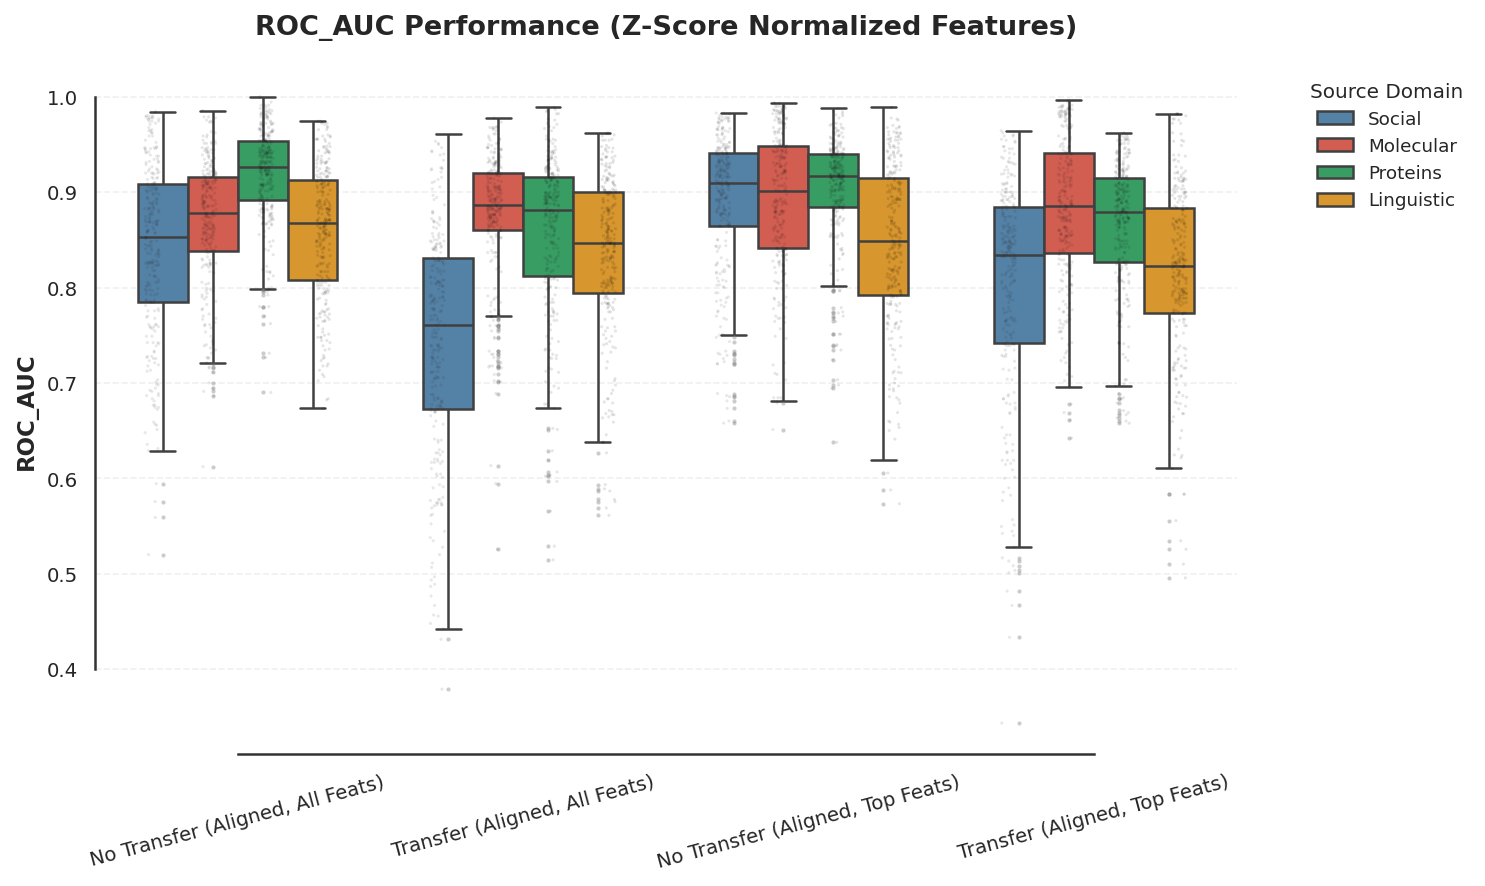

📸 Figure saved → boxplot_performance_ap.png / .pdf


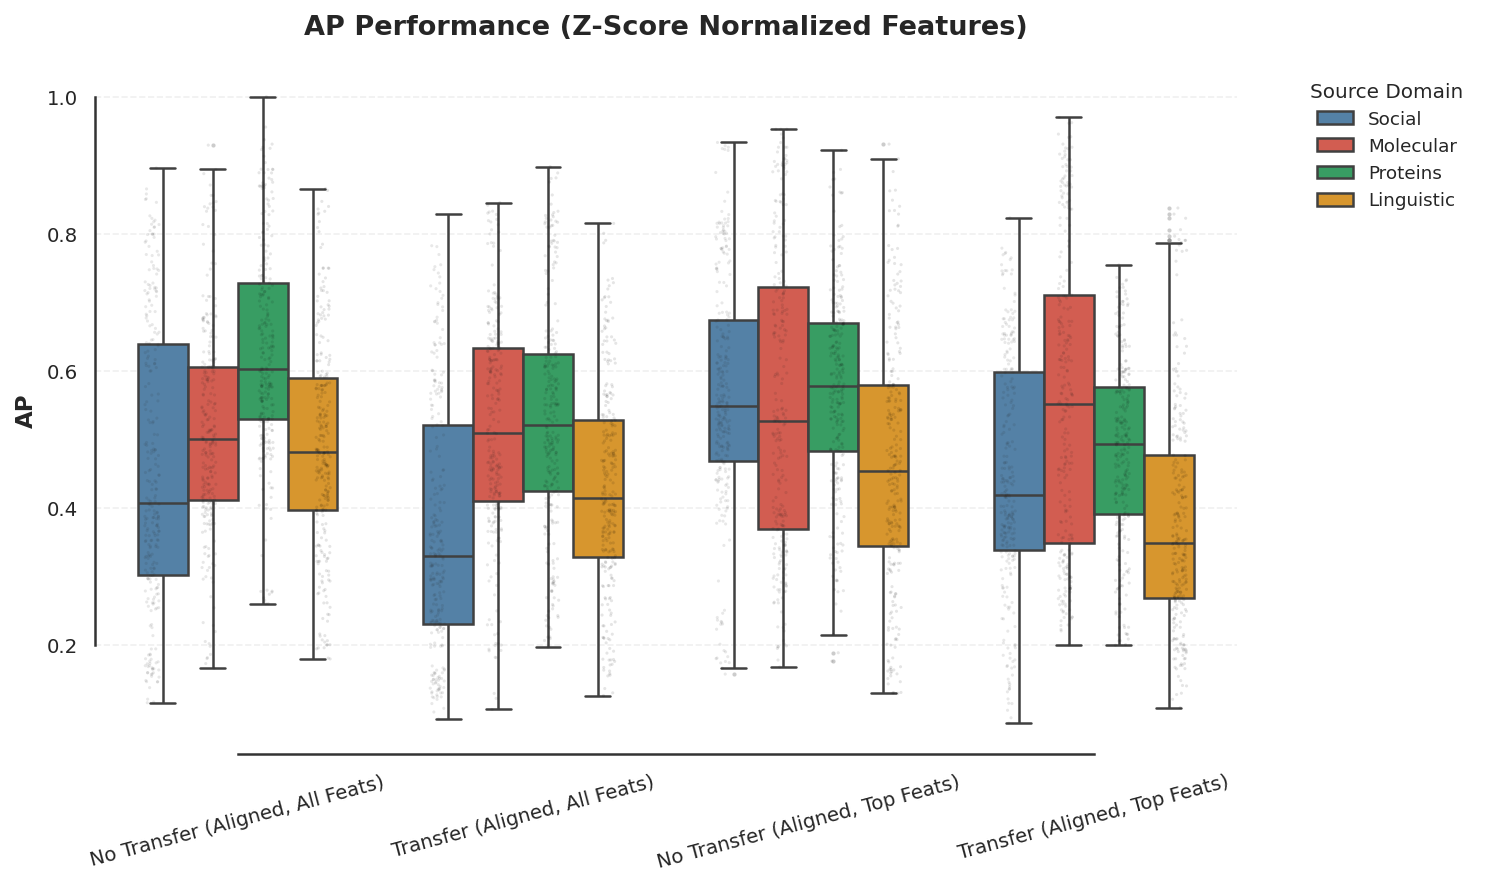

📸 Figure saved → boxplot_performance_f1.png / .pdf


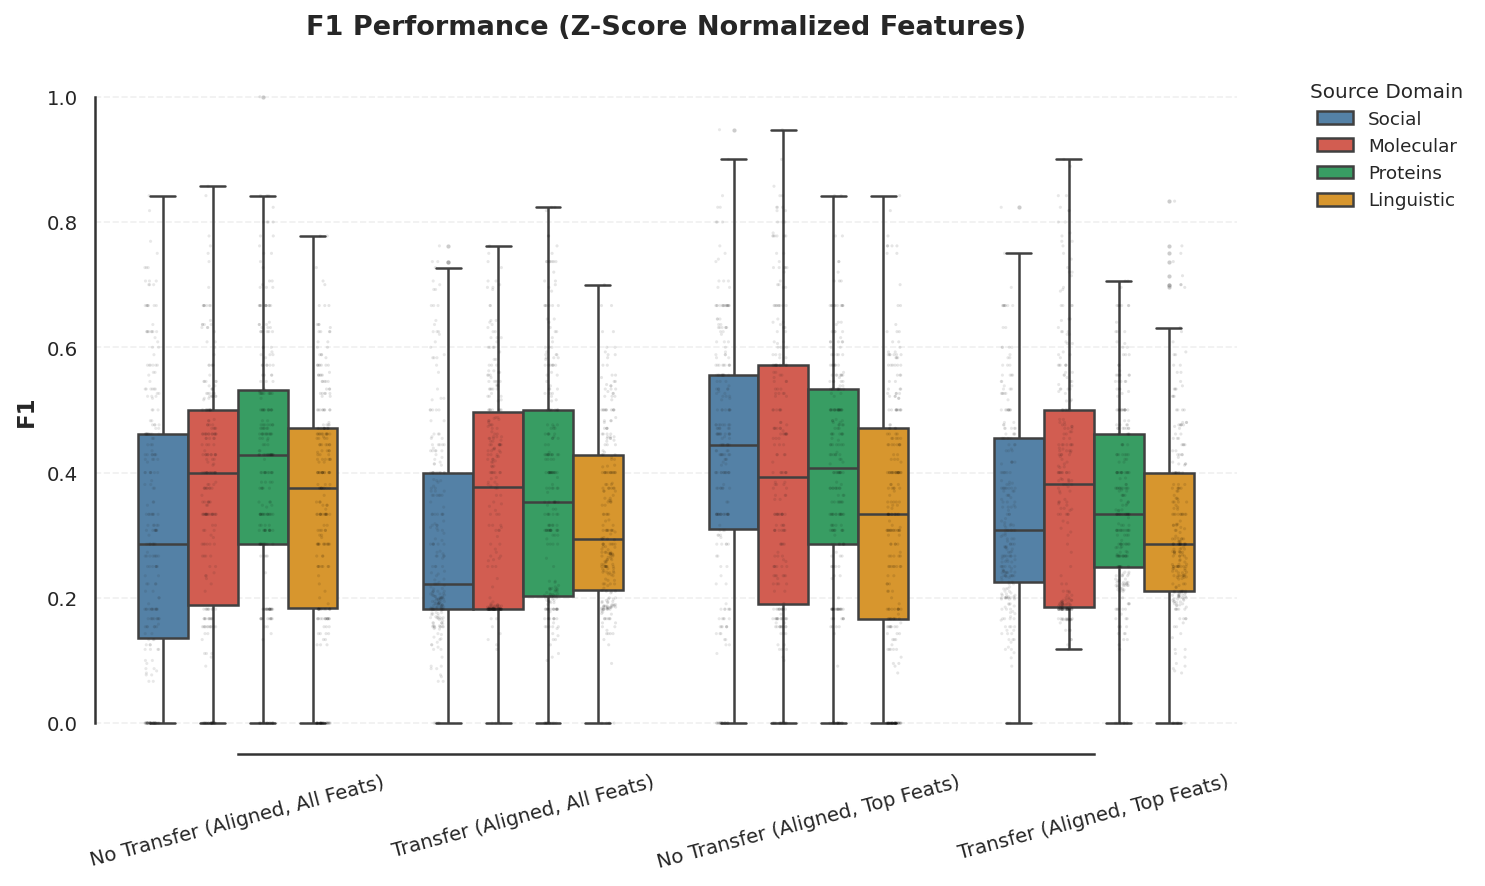


📈 Plotting Performance Dynamics vs Data Fraction...
📸 Figure saved → performance_vs_data_fraction.png / .pdf


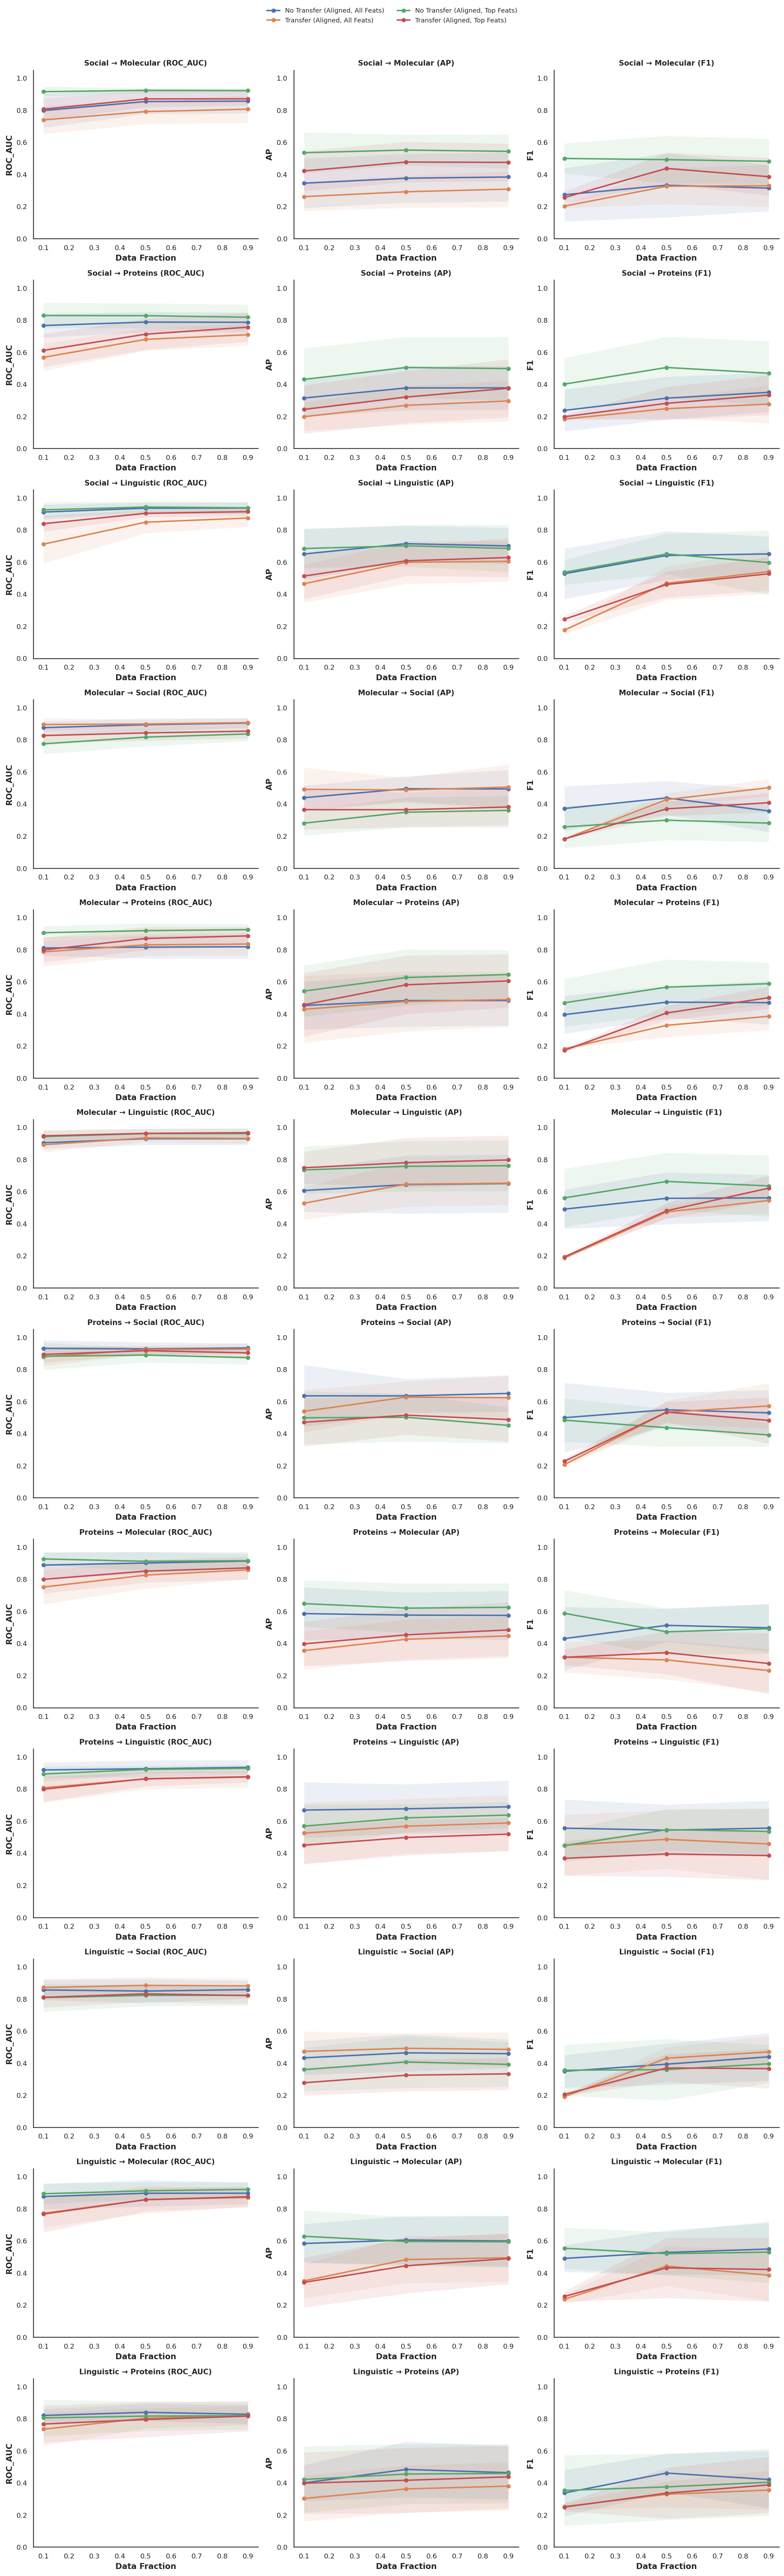


📈 Plotting Performance Dynamics vs Noise Level...
📸 Figure saved → performance_vs_noise_level.png / .pdf


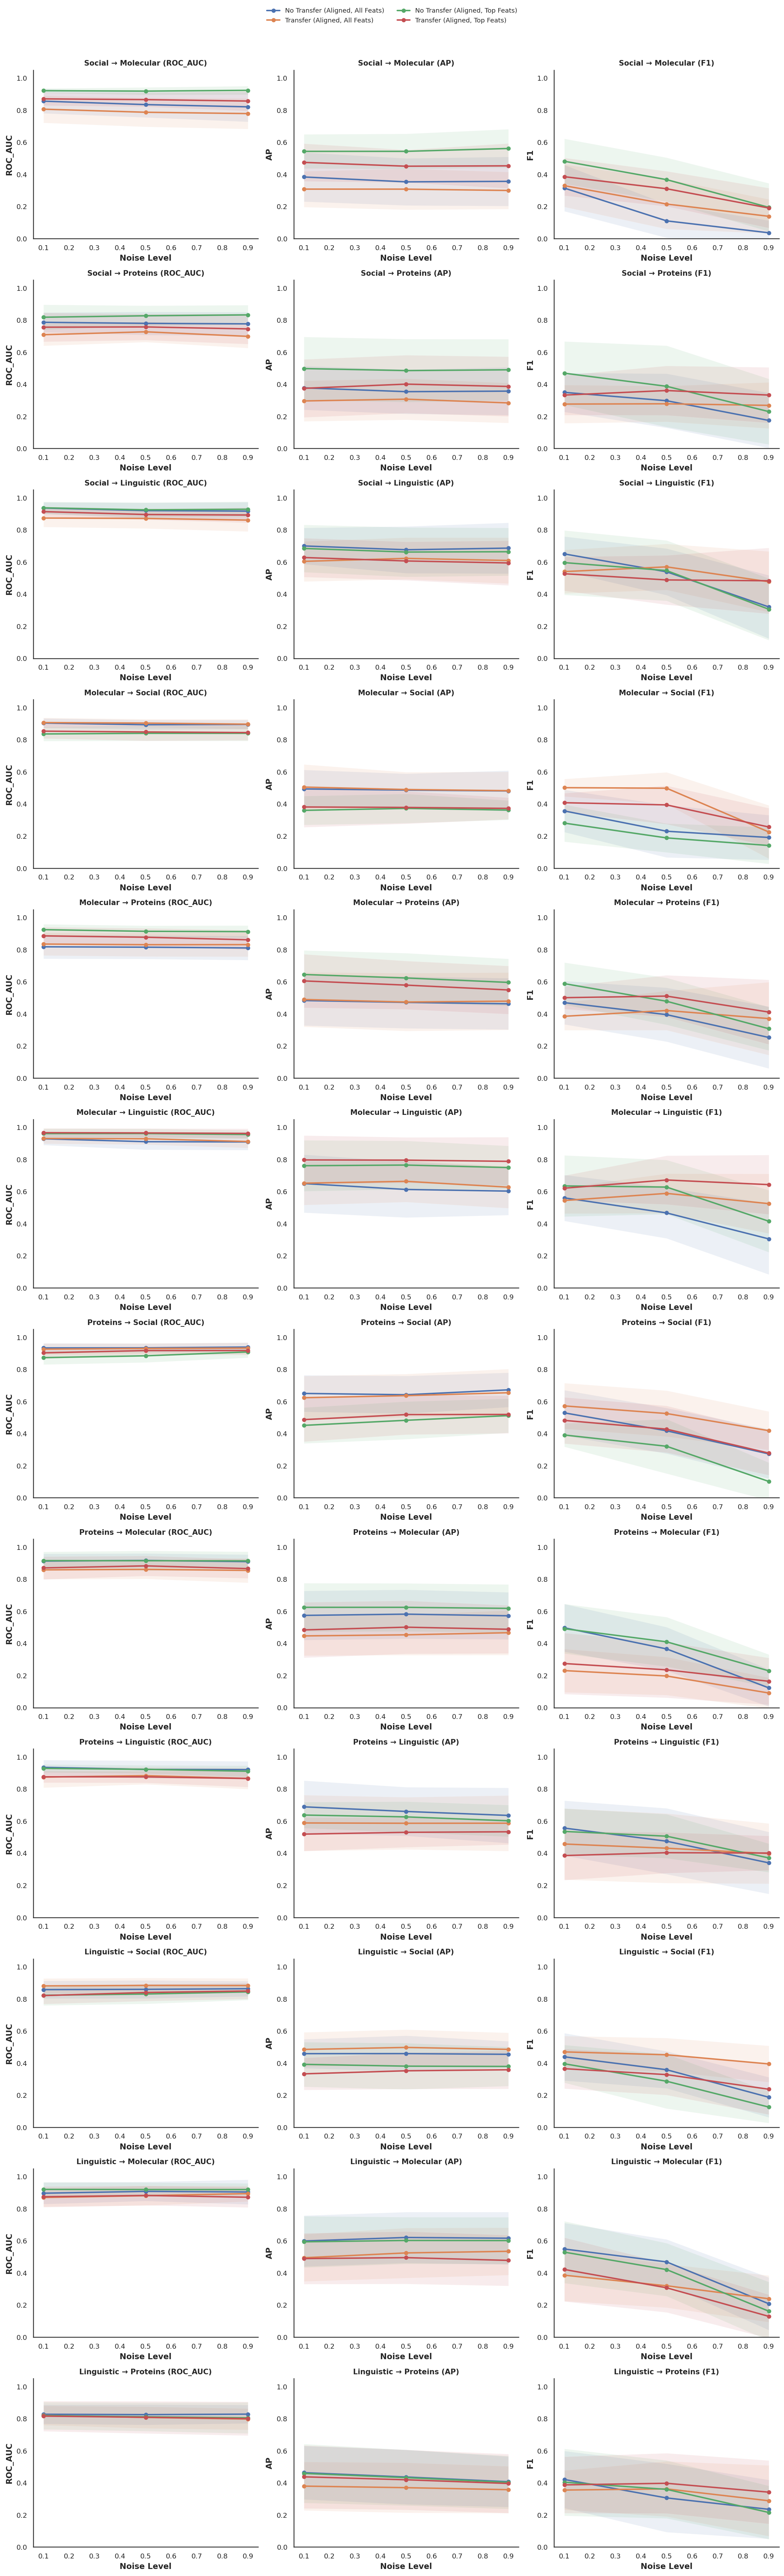


📊 Generating Comprehensive Topological-Performance Mapping Table...

🌍 MAPPING SUMMARY (Ordered: Social → Molecular → Proteins → Linguistic):


💾 Full mapping table saved to: results_nature/mapping_full_metrics_tgi.csv

✅ MODULE 5 completed on GPU (18409 MB free available).


In [5]:
# ==============================================================================
# === X-CDTL Framework | Module 5: Statistical Synthesis & Boundary Dynamics ===
# ==============================================================================
# Researcher: Daniele Caligiore
# Affiliation: CNR - Italian National Research Council (ISTC)
# Version: 3.0 (Feb 2026)
# ------------------------------------------------------------------------------
# DESCRIPTION:
# This module performs the comprehensive meta-analysis and high-fidelity 
# visualization of cross-domain transfer experiments. It characterizes the 
# "Diversity-Driven Rescue Effect" by mapping framework resilience across 
# variable data scarcity (α) and noise (η) regimes. The pipeline utilizes 
# non-parametric inferential statistics to quantify systematic performance 
# shifts and provides a multi-scale synthesis of structural affinities.
#
# CORE PIPELINE:
# 1. Inferential Statistics: Rigorous validation via Kruskal-Wallis H-test 
#    and Bonferroni-corrected Dunn post-hoc analysis.
# 2. Performance Sensitivity Mapping: Evaluation of decay curves as a function 
#    of target data fraction (α) and noise intensity (η).
# 3. Threshold Stability Profiling: Comparative boxplots characterizing 
#    decision manifold regularization (F1-score robustness).
# 4. Integrated Topological Mapping: Synthesis of Global Consensus metrics 
#    vs. realized Transfer Gain Index (TGI).
# 5. Publication Export: Generation of 600 DPI PNG and vector-based PDF assets.
# ------------------------------------------------------------------------------

print("\n📊 Executing X-CDTL Module 5 — Meta-Analysis & Performance Characterization")

import torch, os, numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from scipy.stats import linregress, kruskal
import scikit_posthocs as sp

# ------------------------------------------------------------
# === GPU STATUS MONITORING ===
# ------------------------------------------------------------
def check_gpu_status():
    """Report active GPU specifications and available VRAM for transparency."""
    if torch.cuda.is_available():
        device = torch.device("cuda")
        gpu_name = torch.cuda.get_device_name(0)
        free_mem, total_mem = torch.cuda.mem_get_info()
        print(f"✅ GPU active: {gpu_name}")
        print(f"📊 Memory Status: {free_mem//1024**2} MB free / {total_mem//1024**2} MB total\n")
    else:
        device = torch.device("cpu")
        print("⚠️ GPU not available — BLOCCO 5 will execute on CPU.\n")
    return device

device = check_gpu_status()

# ------------------------------------------------------------
# === INPUT VALIDATION ===
# ------------------------------------------------------------
required_vars = ["df_ext_aligned", "TGI", "summary_ext", "target_seeds"]
for v in required_vars:
    if v not in globals():
        raise RuntimeError(f"❌ Missing prerequisite variable: {v}. Please execute preceding blocks first.")

# ------------------------------------------------------------
# === VISUALIZATION SETTINGS (COHERENT WITH MODULE 2) ===
# ------------------------------------------------------------
sns.set_theme(style="white", context="paper") 
plt.rcParams.update({
    "font.family": "sans-serif",
    "axes.edgecolor": "#333333",
    "axes.linewidth": 1.2,        
    "axes.labelweight": "bold",   
    "axes.labelsize": 11, 
    "axes.titlesize": 12,
    "xtick.labelsize": 9.5, 
    "ytick.labelsize": 9.5, 
    "xtick.major.width": 1.2,
    "ytick.major.width": 1.2,
    "figure.dpi": 150, 
    "savefig.dpi": 150
})

output_dir = "figures_nature"
results_dir = "results_nature"
os.makedirs(output_dir, exist_ok=True)
os.makedirs(results_dir, exist_ok=True)

def save_highres(filename_base):
    """Export current figure in high-resolution PNG (300 DPI) and vector PDF formats."""
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f"{filename_base}.png"), dpi=300, bbox_inches="tight")
    plt.savefig(os.path.join(output_dir, f"{filename_base}.pdf"), bbox_inches="tight", transparent=True)
    print(f"📸 Figure saved → {filename_base}.png / .pdf")

# ------------------------------------------------------------
# === PARAMETERS & DOMAIN ORDERING ===
# ------------------------------------------------------------
scenarios_order = [
    "No Transfer (Aligned, All Feats)",
    "Transfer (Aligned, All Feats)",
    "No Transfer (Aligned, Top Feats)",
    "Transfer (Aligned, Top Feats)"
]
metrics_perf = ["roc_auc", "ap", "f1"]

domain_order = ["Social", "Molecular", "Proteins", "Linguistic"]
domain_priority = {d: i for i, d in enumerate(domain_order)}

DOMAIN_COLORS = {
    "Social": "#4682B4",     # Steel Blue
    "Molecular": "#E74C3C",  # Alizarin/Coral
    "Proteins": "#27AE60",   # Emerald Green
    "Linguistic": "#F39C12"  # Goldenrod
}

def get_pair_sort_key(pair_name):
    """Helper to sort strings like 'Social → Molecular' based on domain_order."""
    src = str(pair_name).split(" → ")[0]
    return domain_priority.get(src, 99)

# Adaptive filter selection (handles Worst Case single-point)
available_noises = df_ext_aligned["noise_level"].unique()
available_fracs = df_ext_aligned["low_data_frac"].unique()
noise_fixed = 0.1 if 0.1 in available_noises else available_noises[0]
low_data_fixed = 0.9 if 0.9 in available_fracs else available_fracs[0]

print(f"⚙️ Visualization filters: Noise fixed at {noise_fixed}, Data Fraction fixed at {low_data_fixed}")

# Prep data for plotting
df_plot = df_ext_aligned.copy()
df_plot["Scenario"] = pd.Categorical(df_plot["Scenario"], categories=scenarios_order, ordered=True)
df_plot["Source"] = df_plot["DomainPair"].apply(lambda x: str(x).split(" → ")[0])

# ------------------------------------------------------------
# === AGGREGATED PERFORMANCE SUMMARY (ORDERED) ===
# ------------------------------------------------------------
print(f"📈 Computing global performance summary (Averaged over {len(target_seeds)} realizations)...")

summary = df_plot.groupby(["DomainPair", "Scenario"])[metrics_perf].agg(["mean", "std"]).round(3).reset_index()
summary["sort_key"] = summary["DomainPair"].apply(get_pair_sort_key)
summary = summary.sort_values(["sort_key", "DomainPair", "Scenario"]).drop(columns=["sort_key"]).reset_index(drop=True)

display(summary)

global_avg = df_plot.groupby("Scenario")[metrics_perf].mean().round(3)
print("\n🌍 GLOBAL AVERAGE PERFORMANCE:")
display(global_avg)

summary.to_csv(os.path.join(results_dir, "summary_performance_detailed.csv"))
global_avg.to_csv(os.path.join(results_dir, "summary_global_average.csv"))

# ------------------------------------------------------------
# === NON-PARAMETRIC INFERENTIAL STATISTICS ===
# ------------------------------------------------------------
print("\n🧠 Executing non-parametric inference (Kruskal–Wallis + Dunn post-hoc)...")

for metric in metrics_perf: 
    print(f"\n=== {metric.upper()} ===")
    groups = [df_plot[df_plot["Scenario"] == s][metric].dropna() for s in scenarios_order]
    if all(len(g) > 1 for g in groups):
        stat, p = kruskal(*groups)
        print(f"Kruskal–Wallis H={stat:.3f}, p={p:.5f}")
        if p < 0.05:
            dunn = sp.posthoc_dunn(df_plot, val_col=metric, group_col="Scenario", p_adjust="bonferroni")
            display(dunn)
            dunn.to_csv(os.path.join(results_dir, f"dunn_posthoc_{metric}.csv"), index=True)

# ------------------------------------------------------------
# === COMPARATIVE BOXPLOTS (COHERENT WITH MODULE 2 STYLE) ===
# ------------------------------------------------------------
print("\n📊 Generating comparative boxplots (Coherent with Block 2 aesthetics)...")

for m in metrics_perf:
    plt.figure(figsize=(10, 6))
    
    ax = sns.boxplot(
        data=df_plot, x="Scenario", y=m, 
        hue="Source",              
        hue_order=domain_order,    
        palette=DOMAIN_COLORS,     
        width=0.7, 
        linewidth=1.2, 
        fliersize=2,
        flierprops={"markerfacecolor": "gray", "alpha": 0.4, "markeredgecolor": "none"}
    )
    
    sns.stripplot(data=df_plot, x="Scenario", y=m, order=scenarios_order, 
                  hue="Source", hue_order=domain_order, dodge=True,
                  color="black", alpha=0.1, size=1.5, legend=False)
    
    plt.title(f"{m.upper()} Performance (Z-Score Normalized Features)", fontsize=13, fontweight="bold", pad=15) 
    
    plt.ylabel(m.upper(), fontweight="bold")
    plt.xlabel("")
    plt.xticks(rotation=15)
    
    plt.legend(title="Source Domain", bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)
    
    ax.yaxis.grid(True, linestyle='--', alpha=.3)
    sns.despine(trim=True) 
    
    save_highres(f"boxplot_performance_{m}")
    plt.show()

# ------------------------------------------------------------
# === SENSITIVITY CURVES: STRESS-TEST DYNAMICS ===
# ------------------------------------------------------------
domain_pairs_list = sorted(df_plot["DomainPair"].unique(), key=get_pair_sort_key)

def plot_performance_dynamics(fixed_val, col_name, axis_name, filename):
    print(f"\n📈 Plotting Performance Dynamics vs {axis_name}...")
    fig, axes = plt.subplots(len(domain_pairs_list), len(metrics_perf), figsize=(15, 4 * len(domain_pairs_list)), squeeze=False)
    
    for i, dp in enumerate(domain_pairs_list):
        df_dp = df_plot[(df_plot["DomainPair"] == dp) & (df_plot[col_name] == fixed_val)]
        if df_dp.empty: continue
        
        for j, metric in enumerate(metrics_perf): 
            ax = axes[i, j]
            x_axis_col = "low_data_frac" if col_name == "noise_level" else "noise_level"
            stats_df = df_dp.groupby([x_axis_col, "Scenario"])[metric].agg(["mean", "std"]).reset_index()
            
            for sc in scenarios_order:
                sub = stats_df[stats_df["Scenario"] == sc]
                if sub.empty: continue
                if len(sub) == 1:
                    ax.errorbar(sub[x_axis_col], sub["mean"], yerr=sub["std"], fmt='o', label=sc, capsize=5, markersize=8)
                else:
                    ax.plot(sub[x_axis_col], sub["mean"], marker="o", label=sc, linewidth=2)
                    ax.fill_between(sub[x_axis_col], sub["mean"]-sub["std"], sub["mean"]+sub["std"], alpha=0.1)
            
            ax.set_title(f"{dp} ({metric.upper()})", fontsize=10, fontweight="bold")
            ax.set_ylim(0, 1.05); ax.set_xlabel(axis_name); ax.set_ylabel(metric.upper())
            sns.despine(ax=ax)

    handles, labels = axes[0, 0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.02), ncol=2, frameon=False)
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    save_highres(filename); plt.show()

plot_performance_dynamics(noise_fixed, "noise_level", "Data Fraction", "performance_vs_data_fraction")
plot_performance_dynamics(low_data_fixed, "low_data_frac", "Noise Level", "performance_vs_noise_level")

# ------------------------------------------------------------
# === INTEGRATED TOPOLOGICAL-PERFORMANCE MAPPING TABLE ===
# ------------------------------------------------------------
print("\n📊 Generating Comprehensive Topological-Performance Mapping Table...")

df_perf_avg = df_ext_aligned.groupby(["DomainPair", "Scenario"]).mean(numeric_only=True).reset_index()
nt_df = df_perf_avg[df_perf_avg["Scenario"].str.contains("No Transfer.*Top")].set_index("DomainPair").groupby(level=0).last()
tr_df = df_perf_avg[df_perf_avg["Scenario"].str.contains("Transfer.*Top")].set_index("DomainPair").groupby(level=0).last()

mapping_table = pd.concat([
    # Performance ROC
    nt_df["roc_auc"].rename("ROC_NT"),
    tr_df["roc_auc"].rename("ROC_Trans"),
    # Performance AP 
    nt_df["ap"].rename("AP_NT"),
    tr_df["ap"].rename("AP_Trans"),
    # Performance F1
    nt_df["f1"].rename("F1_NT"),
    tr_df["f1"].rename("F1_Trans")
], axis=1).dropna()

mapping_table["TGI_ROC"] = (mapping_table["ROC_Trans"] - mapping_table["ROC_NT"]) / (mapping_table["ROC_NT"] + 1e-7)
mapping_table["TGI_F1"] = (mapping_table["F1_Trans"] - mapping_table["F1_NT"]) / (mapping_table["F1_NT"] + 1e-7)
mapping_table["TGI_AP"] = (mapping_table["AP_Trans"] - mapping_table["AP_NT"]) / (mapping_table["AP_NT"] + 1e-7)

domain_order = ["Social", "Molecular", "Proteins", "Linguistic"]
domain_priority = {d: i for i, d in enumerate(domain_order)}

def get_pair_sort_key(pair_name):
    src, tgt = str(pair_name).split(" → ")
    return (domain_priority.get(src, 99), domain_priority.get(tgt, 99))

mapping_table["sort_tuple"] = [get_pair_sort_key(x) for x in mapping_table.index]
mapping_table = mapping_table.sort_values(by="sort_tuple").drop(columns=["sort_tuple"]).round(3)

def highlight_positive(val):
    return 'color: green; font-weight: bold' if val > 0 else 'color: black'

print("\n🌍 MAPPING SUMMARY (Ordered: Social → Molecular → Proteins → Linguistic):")
tgi_columns = ['TGI_ROC', 'TGI_F1', 'TGI_AP']
styled_table = mapping_table.style.applymap(highlight_positive, subset=tgi_columns).format("{:.3f}")
display(styled_table)

mapping_table.to_csv(os.path.join(results_dir, "mapping_full_metrics_tgi.csv"))
print(f"💾 Full mapping table saved to: {results_dir}/mapping_full_metrics_tgi.csv")

if device.type == "cuda":
    free_mem_end, _ = torch.cuda.mem_get_info()
    print(f"\n✅ MODULE 5 completed on GPU ({free_mem_end//1024**2} MB free available).")
else:
    print("\n✅ MODULE 5 completed on CPU.")